# **Customer Segmentation Using K-Means Clustering**

### **Background**

The focus of many companies is to provide the best product along with quality service to stand out in the market. But along with their quality service and better product they also have to make sure that customer don’t slip out in search of alternatives because company exists cause of them and they create every company market share which generates revenue and profits for the company. Every customer is different, here different in the sense we are talking about their age, location, psychology but the most potential parameter is it’s purchasing behavior .Therefore, every segment of customer requires different product at different price. Therefore, every group of customer requires different marketing strategy, to develop different we first have to group similar customer in one segments.

### **Objective**

To determine the value of customers so that companies can decide which class of customer generate healthy revenue and which do not, and also what new market strategy they can apply to improve their revenue growth.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# **Load Dataset**

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Dibimbing.id/TALENT SHOWCASE/Online Retail.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- There are 541909 rows and 8 columns.
- Seems there are missing values on 'StockCode' and 'CustomerId' columns.
- All data type is GOOD!

Data Dictionaries:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer reside.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Exploratory Data Analysis (EDA)**

## **Statistical Summary**

On this stage, we will separate columns based on their data types.

In [ ]:
nums = df.select_dtypes(exclude = 'object')
cats = df.select_dtypes(include = 'object')
datetime = df.select_dtypes(include = 'datetime')

In [ ]:
nums.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
cats.describe()

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


- product "WHITE HANGING HEART T-LIGHT HOLDER" is the product that is most purchased by customers.
- Most of customer from United Kingdom (UK).

In [ ]:
datetime.describe()

C:\Users\ACER\AppData\Local\Temp\ipykernel_1364\3671486051.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  datetime.describe()


,InvoiceDate
count,541909
unique,23260
top,2011-10-31 14:41:00
freq,1114
first,2010-12-01 08:26:00
last,2011-12-09 12:50:00


This dataset is transaction from 2010 to 2011.

## **Univariate Analysis**

In [ ]:
#Making function to visualize top 20 products and top 5 countries
def plot(df, column_name, n=20): #default n = 20, we can customize it.
    top = df[column_name].value_counts().head(n)
    ax = top.plot(kind='barh', figsize=(8, 6))
    plt.grid(False)

    # Adding value on each bar
    for i, v in enumerate(top):
        ax.text(v, i, str(v), ha='left', va='center')

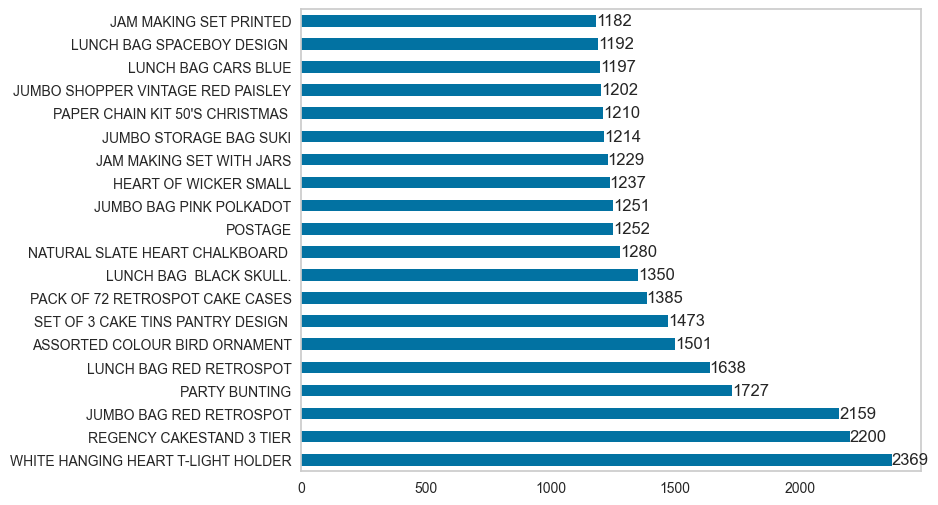

In [ ]:
#Showing top 20 of products
plot(df, 'Description', n=20)

Bar chart above is top 20 of products from this e-commerce.

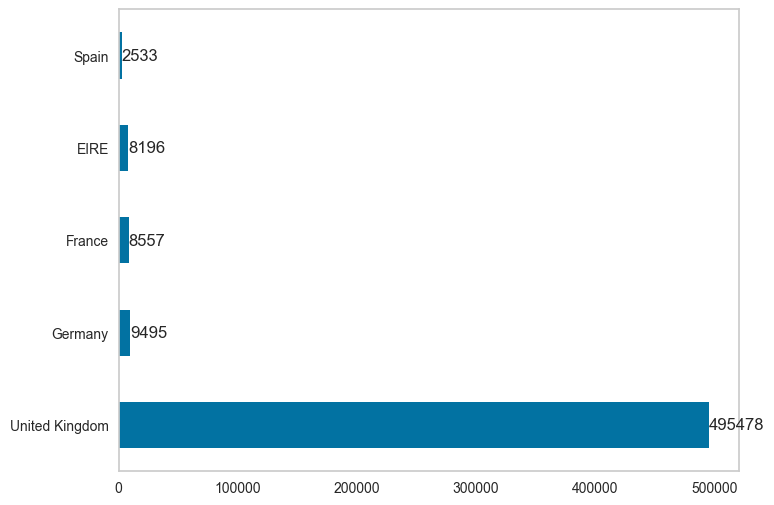

In [ ]:
#showing top 5 country with the highest customers
plot(df, 'Country', n=5)

Based on the graph, it can be known top 5 country with the highest customers, namely, UK, Germany, France, EIRE, and Spain. It can be seen that the difference between the number of customers from the UK and customers from 4 other countries is very significant.

## **Bivariate Analysis**

1. What are Top 10 products with the most transactions?

In [ ]:
top10_product = (df
                 .groupby('Description')
                 .agg(Transaction=('InvoiceNo', 'count'))
                 .reset_index().sort_values('Transaction', ascending=False)
                 .head(10)
                 )
top10_product

,Description,Transaction
3918,WHITE HANGING HEART T-LIGHT HOLDER,2369
2915,REGENCY CAKESTAND 3 TIER,2200
1866,JUMBO BAG RED RETROSPOT,2159
2471,PARTY BUNTING,1727
2054,LUNCH BAG RED RETROSPOT,1638
244,ASSORTED COLOUR BIRD ORNAMENT,1501
3195,SET OF 3 CAKE TINS PANTRY DESIGN,1473
2395,PACK OF 72 RETROSPOT CAKE CASES,1385
2046,LUNCH BAG BLACK SKULL.,1350
2253,NATURAL SLATE HEART CHALKBOARD,1280


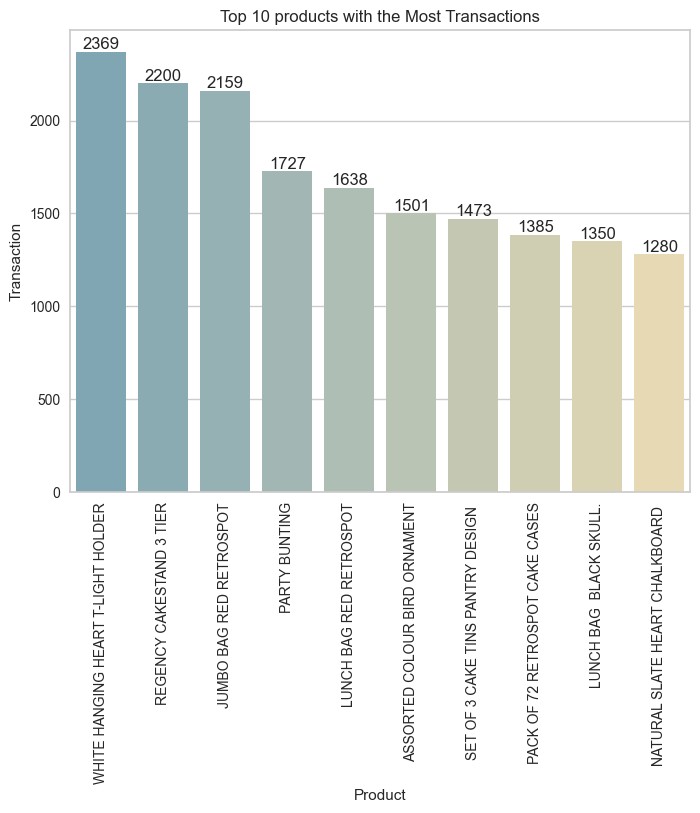

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=top10_product, x='Description', y='Transaction', palette="blend:#7AB,#EDA")
plt.xticks(rotation=90)
plt.xlabel("Product")
plt.title("Top 10 products with the Most Transactions")

# Adding value on each bar
for i, v in enumerate(top10_product['Transaction']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


2. What are Top 10 products with the least transactions?

In [ ]:
low10_product = (df
                 .groupby('Description')
                 .agg(Transaction=('InvoiceNo', 'count'))
                 .reset_index().sort_values('Transaction', ascending=True)
                 .head(10)
                 )
low10_product

,Description,Transaction
0,20713,1
2130,MIA,1
2113,"MERCHANT CHANDLER CREDIT ERROR, STO",1
4221,wrongly sold as sets,1
2096,MARIE ANTOIENETT TRINKET BOX GOLD,1
2069,M/COLOUR POM-POM CURTAIN,1
2068,Lighthouse Trading zero invc incorr,1
2055,LUNCH BAG RED SPOTTY,1
2024,LILY BROOCH WHITE/SILVER COLOUR,1
2019,LILAC FEATHERS CURTAIN,1


Because all products above have the same value of transaction, so it is not interesting to visualize.

3. Who are Top 10 Customers with the most money spend?

In [ ]:
#Create total_price column
df['total_price'] = df['Quantity'] * df['UnitPrice']

# group by aggregation
top10_customer = (df
            .groupby('CustomerID')
            .agg(Total_Spend=('total_price','sum'))
            .reset_index()
            .sort_values('Total_Spend',ascending=False)
            .head(10)
            )

top10_customer

,CustomerID,Total_Spend
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10
2192,15311.0,59419.34


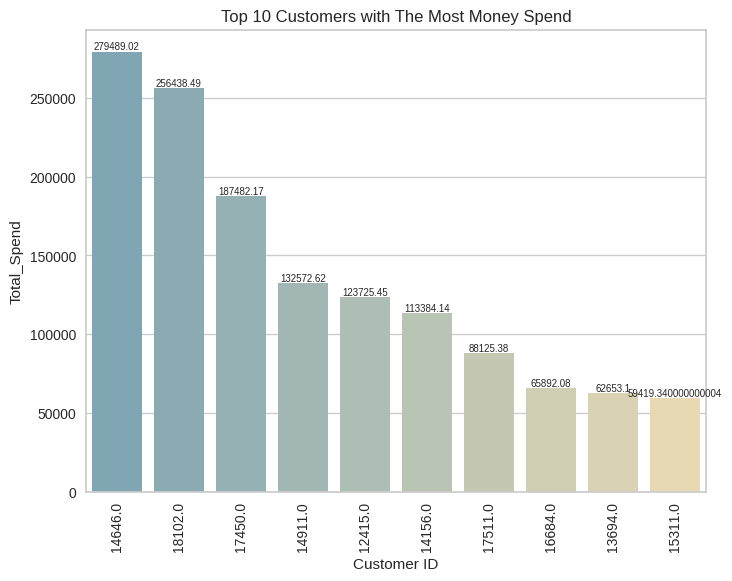

In [ ]:
#Visualization
plt.figure(figsize=(8,6))
top10_customer['CustomerID'] = top10_customer['CustomerID'].astype(str)
ax= sns.barplot(data=top10_customer, x='CustomerID', y='Total_Spend', palette= "blend:#7AB,#EDA")
plt.xticks(rotation=90)
plt.xlabel("Customer ID")
plt.title("Top 10 Customers with The Most Money Spend")
# Adding value on each bar
for i, v in enumerate(top10_customer['Total_Spend']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=7)
plt.show()

4. Countries with the highest amount spend?

In [ ]:
country_user = (df
              .groupby(['Country', 'CustomerID'])
              .agg(total_spend = ('total_price', 'sum'))
              .reset_index())
country_user

,Country,CustomerID,total_spend
0,Australia,12386.0,401.90
1,Australia,12388.0,2780.66
2,Australia,12393.0,1582.60
3,Australia,12415.0,123725.45
4,Australia,12422.0,386.20
...,...,...,...
4375,United Kingdom,18287.0,1837.28
4376,Unspecified,12363.0,552.00
4377,Unspecified,12743.0,546.43
4378,Unspecified,14265.0,530.18


In [ ]:
country_user.Country.value_counts()

United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Iceland       

In [ ]:
# filter to top 5 contries (most CustomerID) only
# using isin technique
top5_countries = ['United Kingdom','Germany','France','Spain', 'Belgium']
country_user = country_user[country_user['Country'].isin(top5_countries)]
country_user

,Country,CustomerID,total_spend
22,Belgium,12361.0,189.90
23,Belgium,12362.0,5154.58
24,Belgium,12364.0,1313.10
25,Belgium,12379.0,850.29
26,Belgium,12380.0,2720.56
...,...,...,...
4371,United Kingdom,18280.0,180.60
4372,United Kingdom,18281.0,80.82
4373,United Kingdom,18282.0,176.60
4374,United Kingdom,18283.0,2094.88


<Axes: xlabel='Country', ylabel='total_spend'>

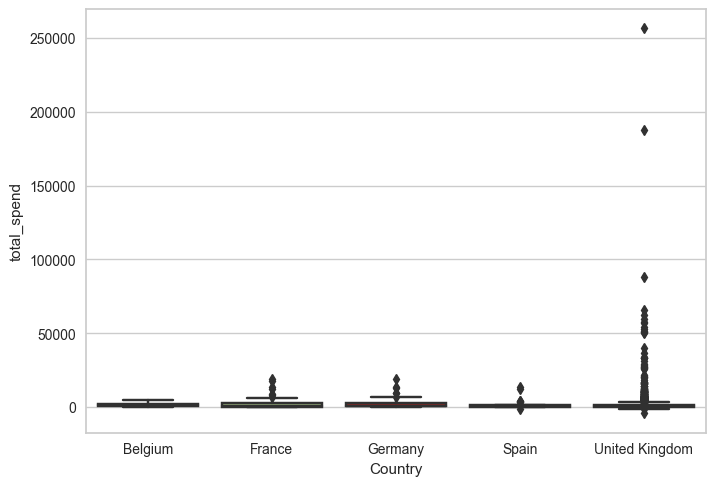

In [ ]:
sns.boxplot(data=country_user,
            x='Country',
            y='total_spend')

## **Multivariate Analysis**

C:\Users\ACER\AppData\Local\Temp\ipykernel_1364\484435200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

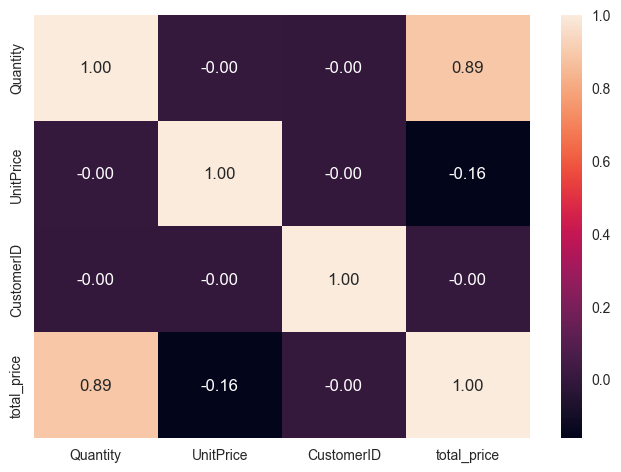

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Based on heatmap, we can see that Quantity and total_price has high correlation. It can be assumed that the more items purchased, the higher the price.

# **Data Pre-Processing**

In [ ]:
#rename the 'total_price' to 'GMV'
df.rename(columns = {'total_price':'GMV'}, inplace = True)

Gross merchandises value (GMV) is the total value of merchandise sold over a given period of time through a customer-to-customer (C2C) exchange site.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GMV
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


We will filter this dataset and just use top 3 countries for this project, namely United Kingdom, Germany, France.

In [ ]:
new_data = df.copy()

In [ ]:
#filter top 3 of countries
new_data = new_data[new_data['Country'].isin(['United Kingdom', 'Germany', 'France'])]

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513530 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    513530 non-null  object        
 1   StockCode    513530 non-null  object        
 2   Description  512076 non-null  object        
 3   Quantity     513530 non-null  int64         
 4   InvoiceDate  513530 non-null  datetime64[ns]
 5   UnitPrice    513530 non-null  float64       
 6   CustomerID   379864 non-null  float64       
 7   Country      513530 non-null  object        
 8   GMV          513530 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 39.2+ MB


### **Data Cleansing**

**Check Missing Values**

In [ ]:
new_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133666
Country             0
GMV                 0
dtype: int64

**Check Duplicated Data**

In [ ]:
new_data.duplicated().sum()

5209

**Remove Missing Values**

In [ ]:
new_data = new_data.dropna()

In [ ]:
#Re-Check Missing Values
new_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
GMV            0
dtype: int64

**Remove Duplicated Data**

In [ ]:
new_data = new_data.drop_duplicates()

In [ ]:
#recheck
new_data.duplicated().sum()

0

Missing Values and Duplicated Data has removed. Good!

Check Time Range

In [ ]:
print(new_data['InvoiceDate'].min())
print(new_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


We will use maximum date as time for analyss.

In [ ]:
max_date = new_data['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

### **Create Dataset/Dataframe Object for RFM Modelling**

RFM stands for :

**Recency** (R): How recently customers have made their purchases.

**Frequency** (F): How often customers have made their purchases.

**Monetary**(M): How much money customers have paid for their purchases.

RFM analysis is a customer behavior segmentation technique. Based on customers’ historical transactions, RFM analysis focuses on 3 main aspects of customers’ transactions: recency, frequency and purchase amount.


In [ ]:
data_rfm = new_data.groupby(['CustomerID'], as_index=False).agg({
    'InvoiceDate' : lambda x: (max_date - x.max()).days,
    'InvoiceNo' : 'count',
    'GMV' : 'sum'
})

In [ ]:
data_rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,GMV
0,12346.0,325,2,0.00
1,12413.0,66,40,694.15
2,12426.0,194,30,582.73
3,12427.0,11,35,708.37
4,12437.0,1,201,4896.66


In [ ]:
#rename columns
data_rfm.rename(columns = {'InvoiceDate':'Recency',
                           'InvoiceNo':'Frequency',
                           'GMV' : 'Monetary Value'}, inplace=True)

In [ ]:
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary Value
0,12346.0,325,2,0.00
1,12413.0,66,40,694.15
2,12426.0,194,30,582.73
3,12427.0,11,35,708.37
4,12437.0,1,201,4896.66


We will use data with Monetary Value > 0

In [ ]:
data_rfm = data_rfm[data_rfm['Monetary Value'] > 0]
data_rfm

,CustomerID,Recency,Frequency,Monetary Value
1,12413.0,66,40,694.15
2,12426.0,194,30,582.73
3,12427.0,11,35,708.37
4,12437.0,1,201,4896.66
5,12441.0,366,11,173.55
...,...,...,...,...
4127,18280.0,277,10,180.60
4128,18281.0,180,7,80.82
4129,18282.0,7,13,176.60
4130,18283.0,3,721,2045.53


### **RFM Segmentation**

In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_rfm['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_rfm['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_rfm['Monetary Value'], q=4, labels = m_labels)

In [ ]:
list(range(1,5))

[1, 2, 3, 4]

In [ ]:
list(range(4, 0, -1))

[4, 3, 2, 1]

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value
1,12413.0,66,40,694.15
2,12426.0,194,30,582.73
3,12427.0,11,35,708.37
4,12437.0,1,201,4896.66
5,12441.0,366,11,173.55
...,...,...,...,...
4127,18280.0,277,10,180.60
4128,18281.0,180,7,80.82
4129,18282.0,7,13,176.60
4130,18283.0,3,721,2045.53


In [ ]:
data_rfm = data_rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M
1,12413.0,66,40,694.15,2,2,3
2,12426.0,194,30,582.73,1,2,2
3,12427.0,11,35,708.37,4,2,3
4,12437.0,1,201,4896.66,4,4,4
5,12441.0,366,11,173.55,1,1,1
...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1
4128,18281.0,180,7,80.82,1,1,1
4129,18282.0,7,13,176.60,4,1,1
4130,18283.0,3,721,2045.53,4,4,4


In [ ]:
data_rfm['RFM_Score'] = data_rfm[['R', 'F', 'M']].apply(lambda x : ''.join(x.astype(str)),
                                                        axis=1)

In [ ]:
data_rfm['RFM_Score'] = data_rfm['RFM_Score'].astype('int')

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score
1,12413.0,66,40,694.15,2,2,3,223
2,12426.0,194,30,582.73,1,2,2,122
3,12427.0,11,35,708.37,4,2,3,423
4,12437.0,1,201,4896.66,4,4,4,444
5,12441.0,366,11,173.55,1,1,1,111
...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111
4128,18281.0,180,7,80.82,1,1,1,111
4129,18282.0,7,13,176.60,4,1,1,411
4130,18283.0,3,721,2045.53,4,4,4,444


### **Post-Segmentation Analysis**

**Heatmap Visualization**

<Axes: xlabel='F', ylabel='R'>

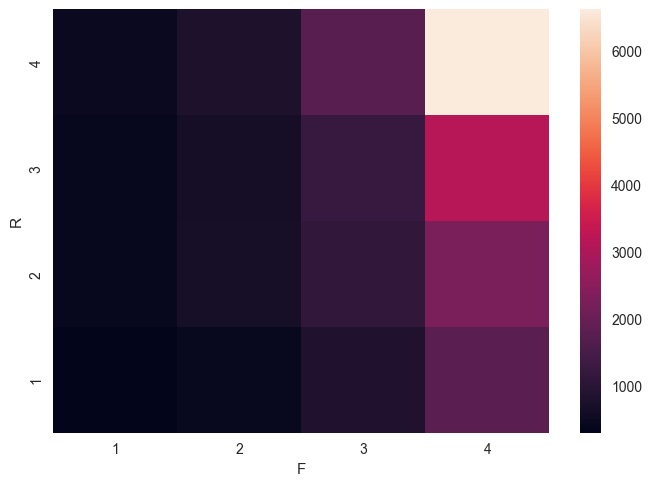

In [ ]:
sns.heatmap(pd.pivot_table(data_rfm[['R', 'F', 'Monetary Value']], values = 'Monetary Value', index = ['R'], columns = ['F'])
)

### **Create Dataframe RFM Distribution**

In [ ]:
rfm_bar_data = data_rfm[['R', 'F', 'M']].groupby(['R', 'F', 'M'], as_index=False).size()

In [ ]:
rfm_bar_data

,R,F,M,size
0,4,1,1,66
1,4,1,2,22
2,4,1,3,15
3,4,1,4,2
4,4,2,1,20
...,...,...,...,...
59,1,3,4,10
60,1,4,1,0
61,1,4,2,4
62,1,4,3,20


C:\Users\ACER\anaconda3\envs\dibimbing\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


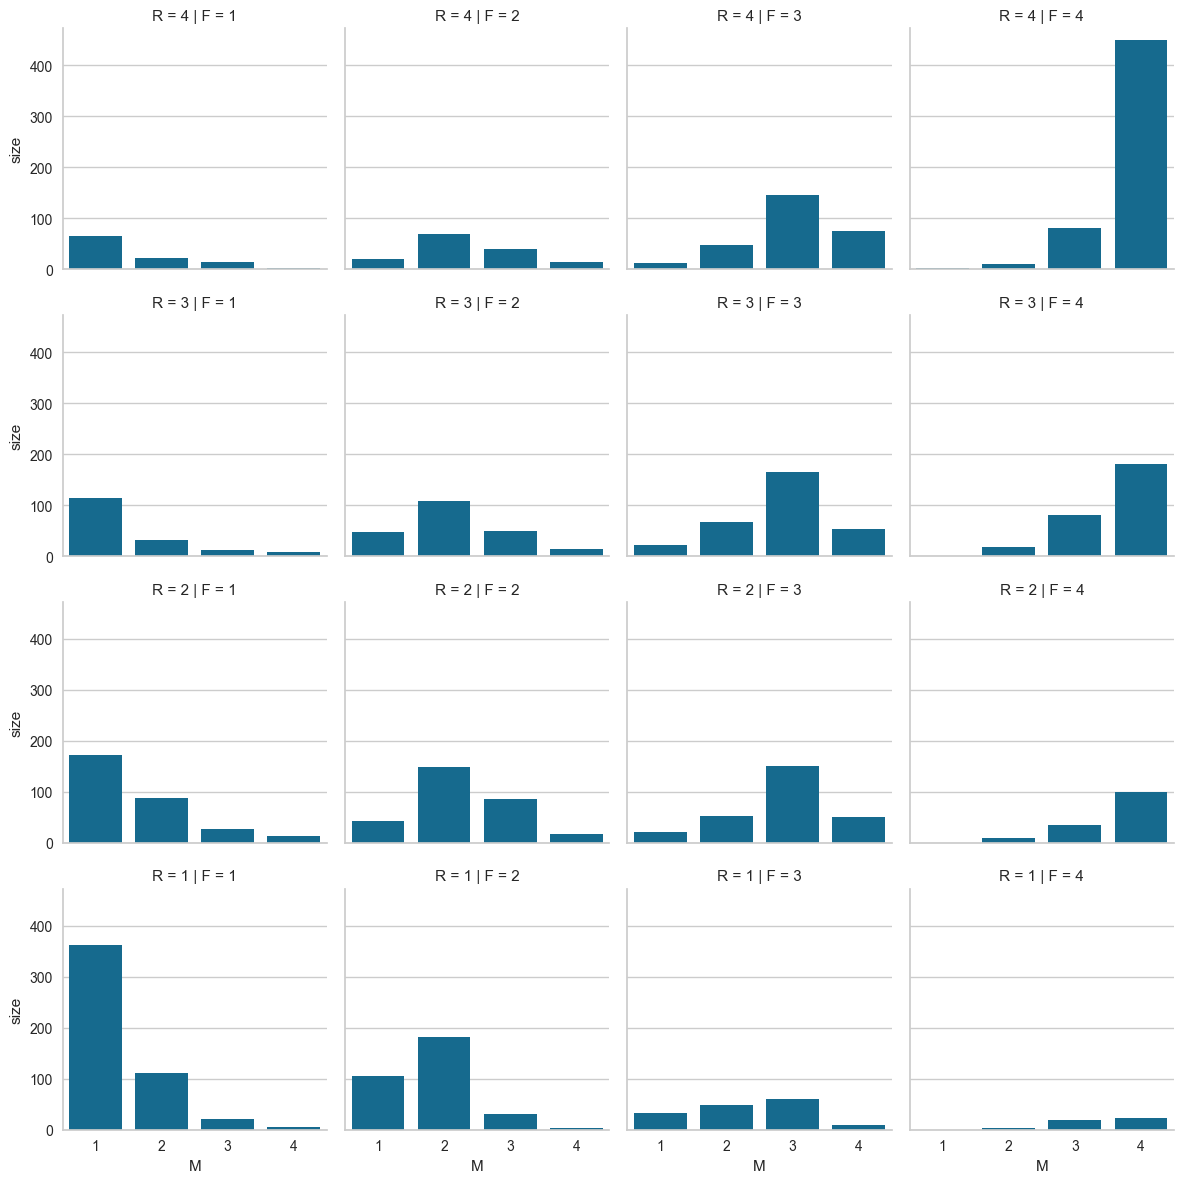

In [ ]:
visual = sns.FacetGrid(data = rfm_bar_data, col = 'F', row = 'R')
visual.map(sns.barplot, 'M', 'size')

**Recency, Frequency, and Monetary Value Distribution**

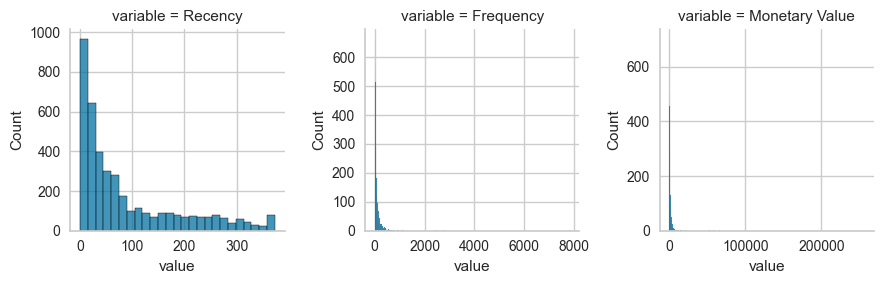

In [ ]:
vis = sns.FacetGrid(data = pd.melt(data_rfm[['Recency', 'Frequency', 'Monetary Value']], value_vars=['Recency', 'Frequency', 'Monetary Value']),
                    col = 'variable',
                    sharex = False,
                    sharey = False)
vis.map(sns.histplot, 'value');

**RFM Score to RFM Segment**

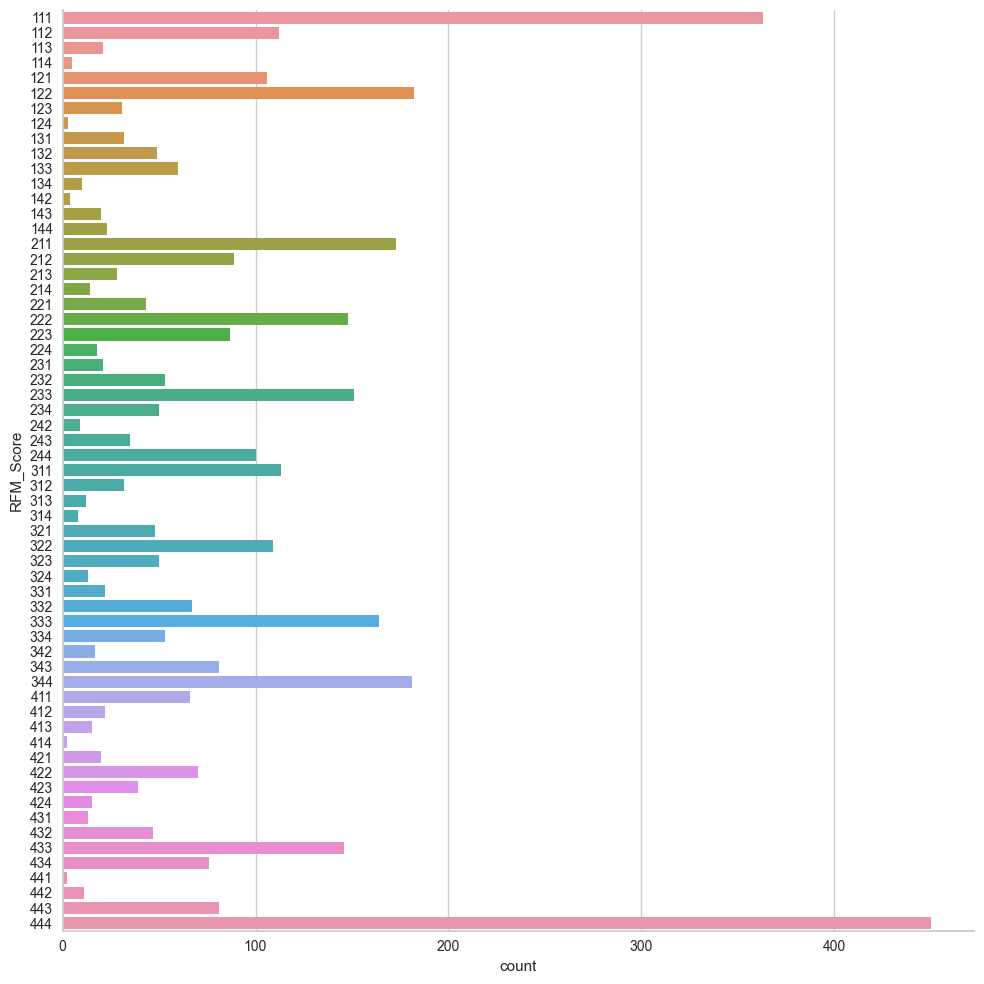

In [ ]:
sns.catplot(
    y = 'RFM_Score',
    data = data_rfm.sort_values(by = ['RFM_Score'], axis = 0),
    kind = 'count',
    height = 10
)

Making Segmentation of Customer Based Recency, Frequency, and Monetary Score

In [ ]:
data_rfm['RFM_Segment'] = np.select(
    [
      data_rfm['RFM_Score'].isin([444]),
      data_rfm['RFM_Score'].isin([333, 334, 343, 344, 433, 434, 443]),
      data_rfm['RFM_Score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
      data_rfm['RFM_Score'].isin([411]),
      data_rfm['RFM_Score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
      data_rfm['RFM_Score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
      data_rfm['RFM_Score'].isin([112, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
      data_rfm['RFM_Score'].isin([111])
    ],
    [
      "Champion", #Customers have all RFM score is 4
      "Loyal Customer", #Customers have R score = 4 and 3, F and M score also = 4 and 3
      "Promising", # Customers with R score = 4 and 3, F and M score = 1, 2, 3, and 4
      "Recent Customers", #Customer have R = 4, F & M = 1
      "Customer Needing Attention", # Customers who have R score dominant = 2, but also there is customer have R = 3, F and M = 1, 2, 3, and 4
      "Can't Lose Them",# Customers with R = 1 and 2, but F and M score = 3 or 4
      "At Risk", # All R score = 1, F and M = 1,2,3, and 4
      "Lost" #Csutomers with all RFM score is 1
    ]
)

- Champion : Customers visit the shop/doing purchasing recently, high frequency, and also spend a lot of money for shopping.
- Loyal Customer : Customers that make repeat purchases
- Promising : Customers that are anticipated to make repeat purchases.
- Recent Customers : New customers that have been acquired lately.
- Customer Needing Attention : Customers could be lost if they are not engaged
- Can't lose them : Essential customers that are on the verge of being lost.
- At risk : Customers who have not purchased/visited recently, but some of them have high frequency and monetary value.
- Lost : Customers that have not engaged, bought, active almost one year, and having low frequency of order and purchasing

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention
2,12426.0,194,30,582.73,1,2,2,122,At Risk
3,12427.0,11,35,708.37,4,2,3,423,Promising
4,12437.0,1,201,4896.66,4,4,4,444,Champion
5,12441.0,366,11,173.55,1,1,1,111,Lost
...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost
4128,18281.0,180,7,80.82,1,1,1,111,Lost
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers
4130,18283.0,3,721,2045.53,4,4,4,444,Champion


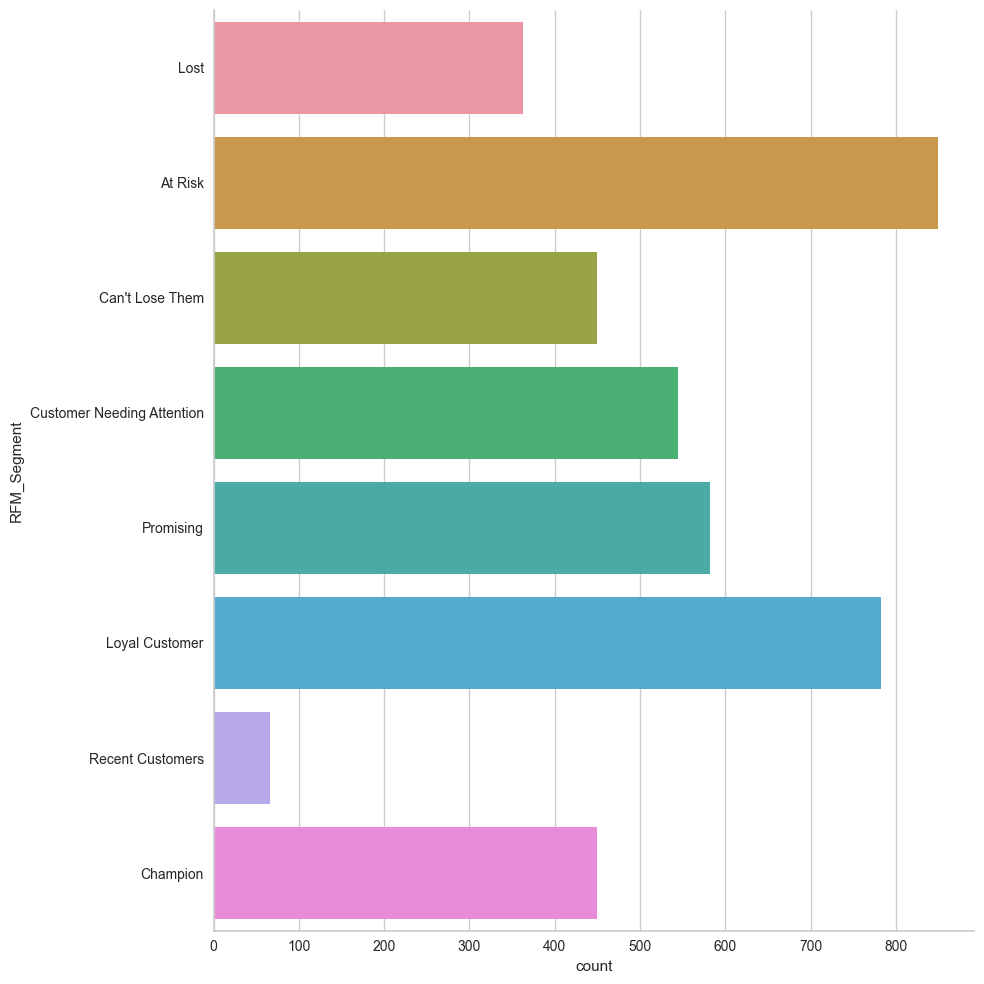

In [ ]:
sns.catplot(
    y = "RFM_Segment",
    data = data_rfm.sort_values(by = ['RFM_Score'], axis = 0),
    kind = 'count',
    height = 10
);

# **K-Means Clustering**

In [ ]:
#Re-Check Data
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention
2,12426.0,194,30,582.73,1,2,2,122,At Risk
3,12427.0,11,35,708.37,4,2,3,423,Promising
4,12437.0,1,201,4896.66,4,4,4,444,Champion
5,12441.0,366,11,173.55,1,1,1,111,Lost
...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost
4128,18281.0,180,7,80.82,1,1,1,111,Lost
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers
4130,18283.0,3,721,2045.53,4,4,4,444,Champion


## **Data Standarization using StandarScaler**

In [ ]:
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(data_rfm[['Recency', 'Frequency', 'Monetary Value']].to_numpy())
data_for_kmeans = pd.DataFrame(scaled_data, columns = ['Recency', 'Frequency', 'Monetary Value'])

**Check Standardize Data**

In [ ]:
data_for_kmeans

,Recency,Frequency,Monetary Value
0,-0.230286,-0.240902,-0.164153
1,1.065287,-0.287545,-0.181362
2,-0.786977,-0.264224,-0.161957
3,-0.888194,0.510045,0.484935
4,2.806212,-0.376166,-0.244561
...,...,...,...
4080,1.905384,-0.380830,-0.243472
4081,0.923583,-0.394823,-0.258883
4082,-0.827464,-0.366837,-0.244090
4083,-0.867950,2.935463,0.044571


## **K-Means Modelling (Baseline)**

For the baseline, we will create cluster using k-means by setting k = 3

In [ ]:
kmeans_model = KMeans(
    n_clusters = 3,
    random_state = 1000
)
kmeans_model.fit(data_for_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1000)

Check frequencies of each cluster

In [ ]:
np.unique(kmeans_model.labels_, return_counts = True)

(array([0, 1, 2]), array([3063, 1012,   10], dtype=int64))

In [ ]:
#Assign cluster to 'cluster' column
data_rfm['Cluster'] = kmeans_model.labels_

## **Post-Modelling Analysis**

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1
3,12427.0,11,35,708.37,4,2,3,423,Promising,0
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0
5,12441.0,366,11,173.55,1,1,1,111,Lost,1
...,...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost,1
4128,18281.0,180,7,80.82,1,1,1,111,Lost,1
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers,0
4130,18283.0,3,721,2045.53,4,4,4,444,Champion,0


In [ ]:
data_rfm['Cluster'].value_counts()

0    3063
1    1012
2      10
Name: Cluster, dtype: int64

Visualization The Total Customers per Segment

Text(0.5, 1.0, 'Total Customer for Each Segment')

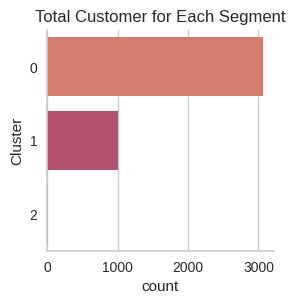

In [ ]:
sns.catplot(
    y = 'Cluster',
    data = data_rfm,
    kind = 'count',
    palette = "flare",
    height = 3
).ax.set_title("Total Customer for Each Segment")

**Recency Days Distribution of Each Segment**

<Axes: xlabel='Cluster', ylabel='Recency'>

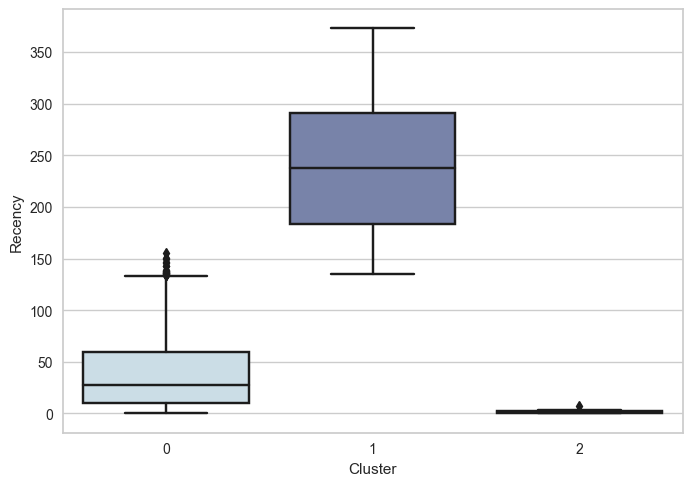

In [ ]:
sns.boxplot(x= 'Cluster', y = 'Recency', data = data_rfm, palette = "ch:s=.25,rot=-.25")

**Transcaction Frequency Distribution of Each Segment**

<Axes: xlabel='Cluster', ylabel='Frequency'>

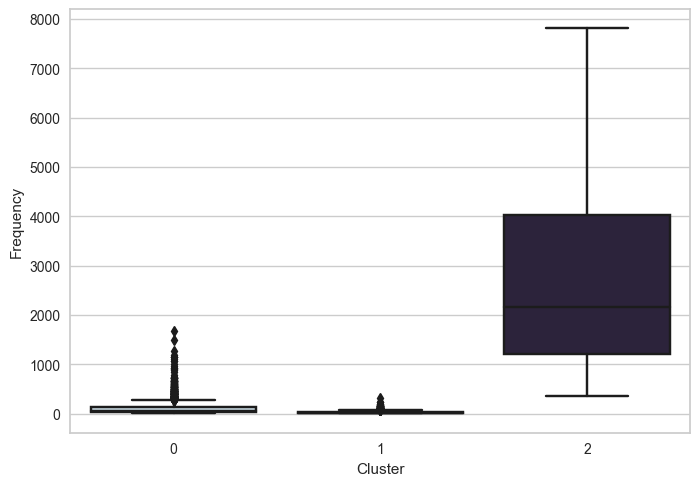

In [ ]:
sns.boxplot(x= 'Cluster', y = 'Frequency', data = data_rfm, palette = "ch:s=.25,rot=-.25")

**Monetary Value Distribution of Each Segment**

<Axes: xlabel='Cluster', ylabel='Monetary Value'>

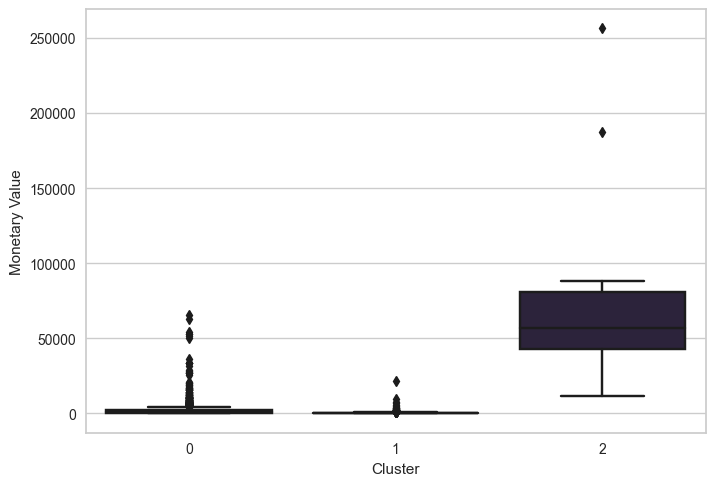

In [ ]:
sns.boxplot(x= 'Cluster', y = 'Monetary Value', data = data_rfm, palette = "ch:s=.25,rot=-.25")

## **Scatter Plot Visualization**

### **Recency vs Frequency Baseline**

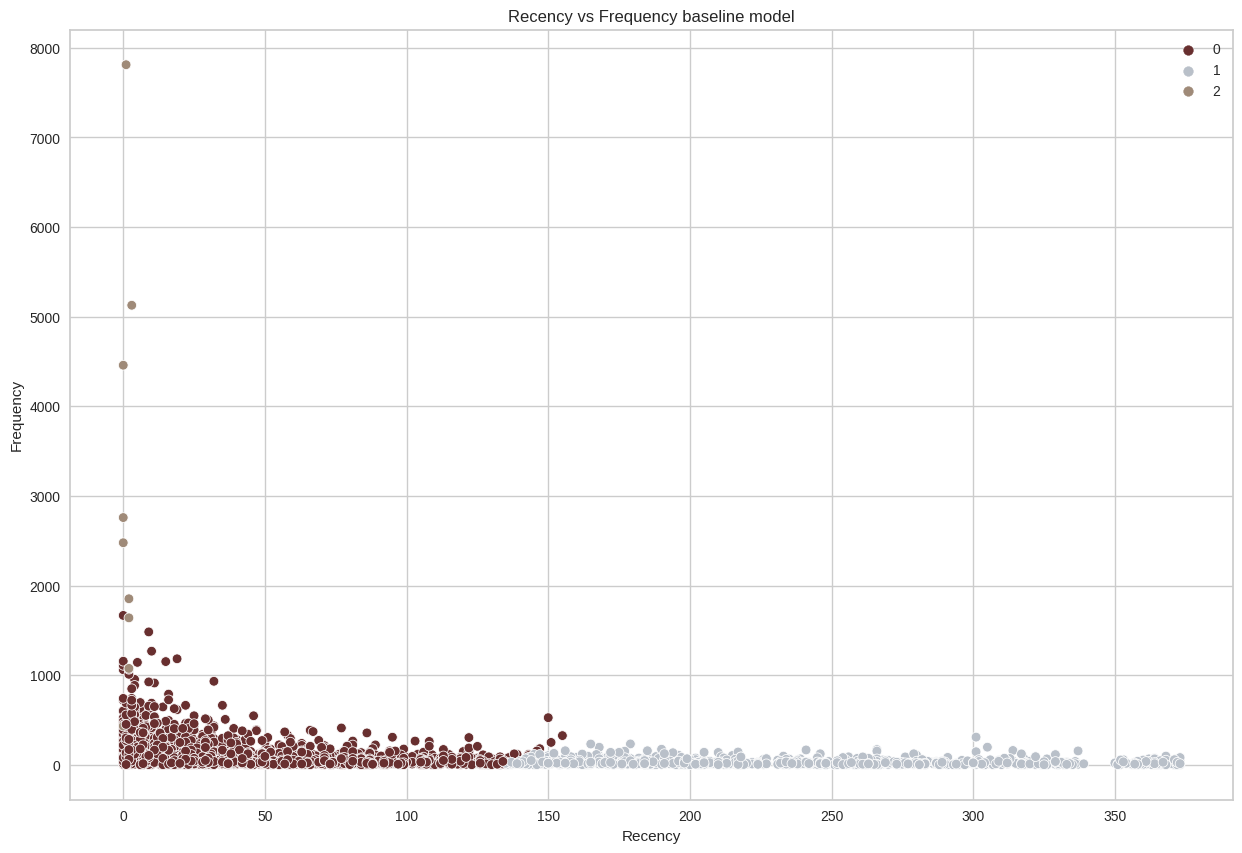

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["Cluster"], palette= pal)
pl.set_title("Recency vs Frequency baseline model")
plt.legend()
plt.show()

### **Recency vs Monetary Value**

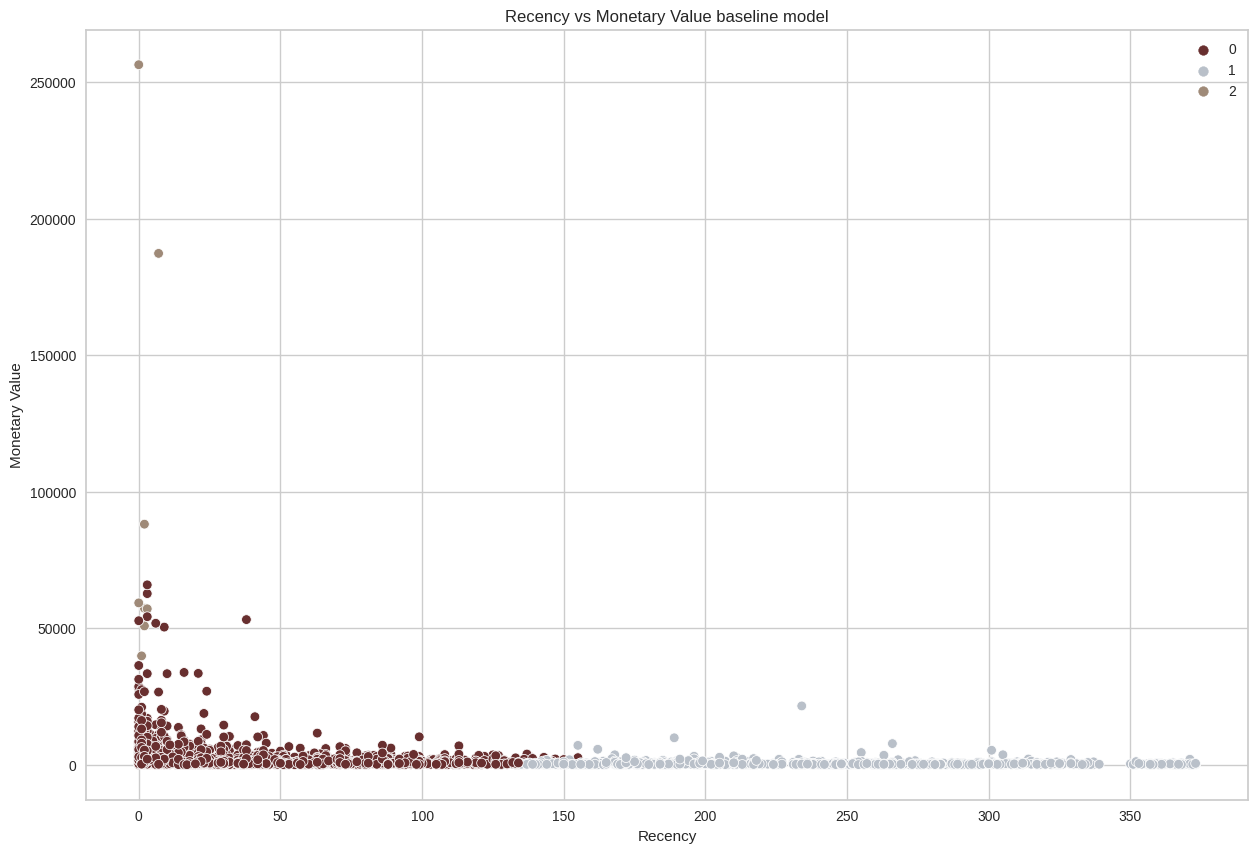

In [ ]:
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Monetary Value'], hue = data_rfm["Cluster"], palette= pal)
pl.set_title("Recency vs Monetary Value baseline model")
plt.legend()
plt.show()

### **Frequency VS Monetary Value baseline /  initial model**

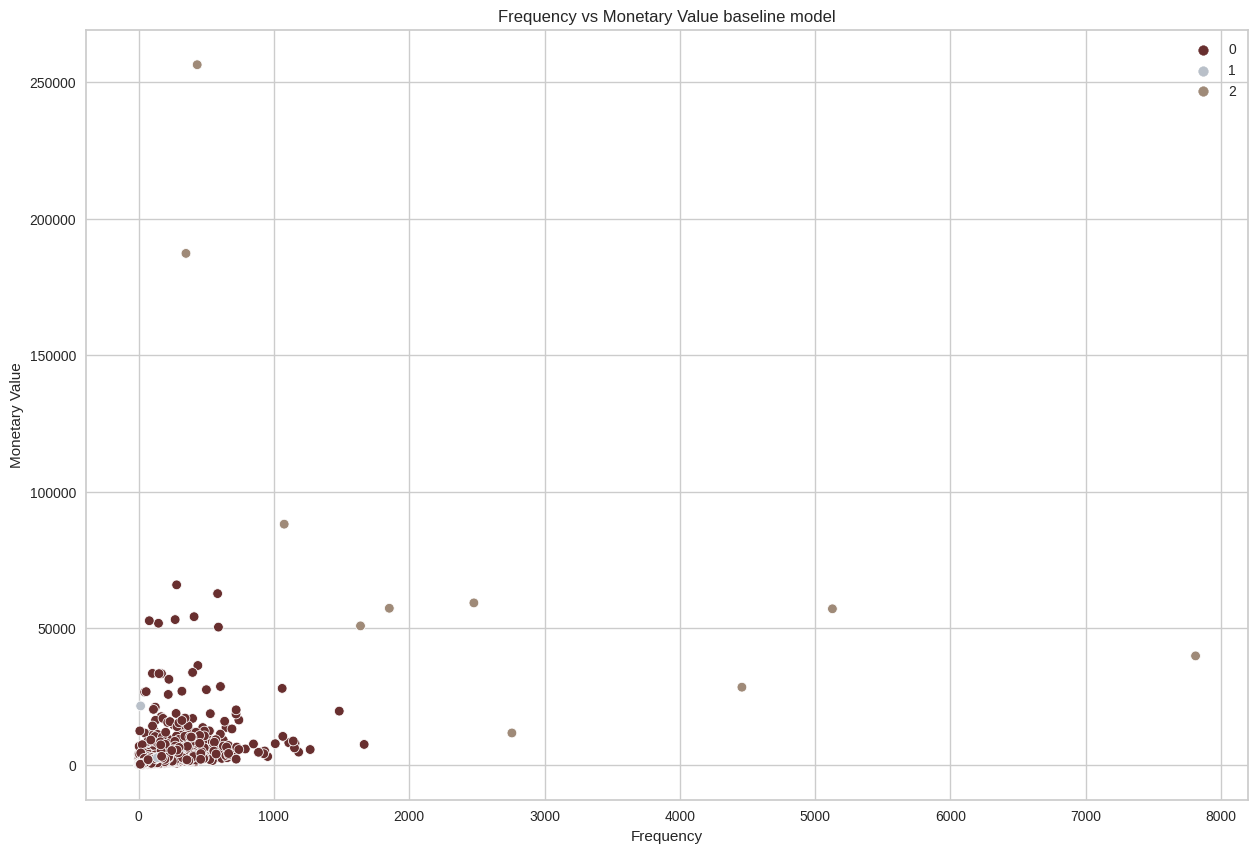

In [ ]:
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['Monetary Value'], hue = data_rfm["Cluster"], palette= pal)
pl.set_title("Frequency vs Monetary Value baseline model")
plt.legend()
plt.show()

# **Cluster Evaluation**

## **Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

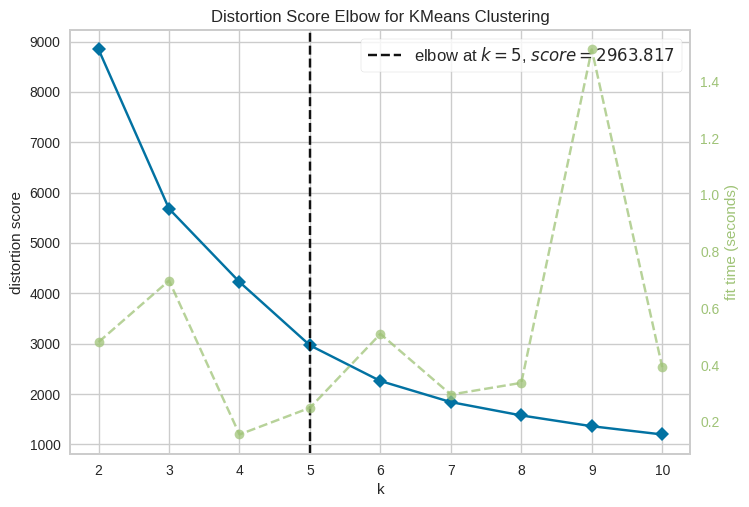

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KElbowVisualizer(KMeans(random_state=1000), k=10)
model.fit(data_for_kmeans)
model.show()

## **Silhoutte Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

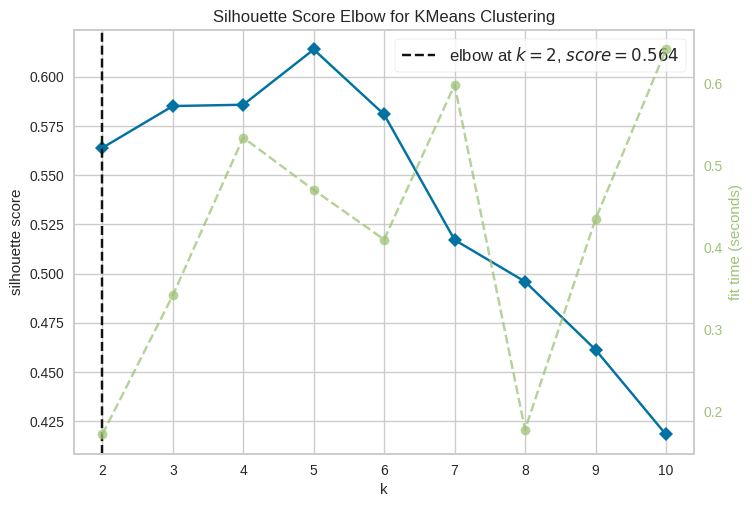

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = model = KElbowVisualizer(KMeans(random_state=1000), k=10, metric = "silhouette")
model.fit(data_for_kmeans)
model.show()

The best K from Elbow and Silhoutte Method is different. Firstly, we will try to make k-means modelling using k=5 based Elbow Method

# **K-Means Elbow**

In [ ]:
kmeans_elbow = KMeans(
    n_clusters = 5,
    random_state = 1000
)
kmeans_elbow.fit(data_for_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1000)

In [ ]:
#Assign cluster to 'cluster' column
data_rfm['Cluster_Elbow'] = kmeans_elbow.labels_
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1


## **Evaluation K-Means Elbow**

In [ ]:
data_rfm.Cluster_Elbow.value_counts()

0    2913
1     993
4     174
2       3
3       2
Name: Cluster_Elbow, dtype: int64

Text(0.5, 1.0, 'Total Customer for Each Segment')

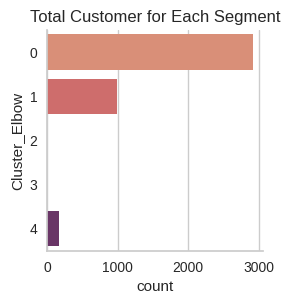

In [ ]:
sns.catplot(
    y = 'Cluster_Elbow',
    data = data_rfm,
    kind = 'count',
    palette = "flare",
    height = 3
).ax.set_title("Total Customer for Each Segment")

**Recency Days Distribution of Each Segment**

<Axes: xlabel='Cluster_Elbow', ylabel='Recency'>

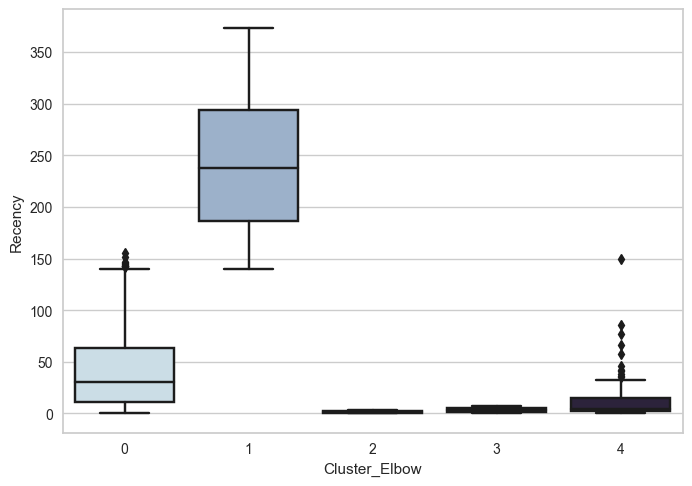

In [ ]:
sns.boxplot(x= 'Cluster_Elbow', y = 'Recency', data = data_rfm, palette = "ch:s=.25,rot=-.25")

**Frequency Distribution of Each Segment**

<Axes: xlabel='Cluster_Elbow', ylabel='Frequency'>

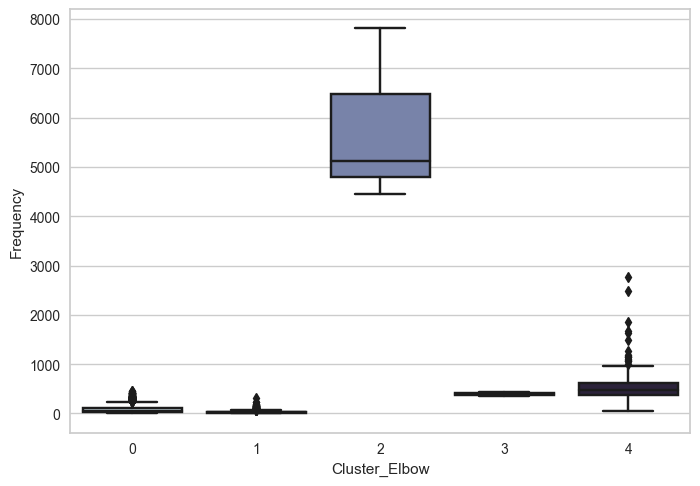

In [ ]:
sns.boxplot(x= 'Cluster_Elbow', y = 'Frequency', data = data_rfm, palette = "ch:s=.25,rot=-.25")

**Monetary Value of Each Segment**

<Axes: xlabel='Cluster_Elbow', ylabel='Monetary Value'>

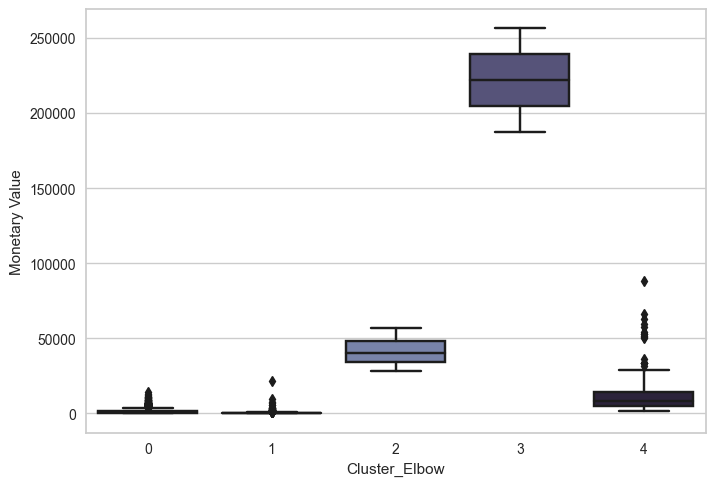

In [ ]:
sns.boxplot(x= 'Cluster_Elbow', y = 'Monetary Value', data = data_rfm, palette = "ch:s=.25,rot=-.25")

## **Visualization using Scatter Plot**

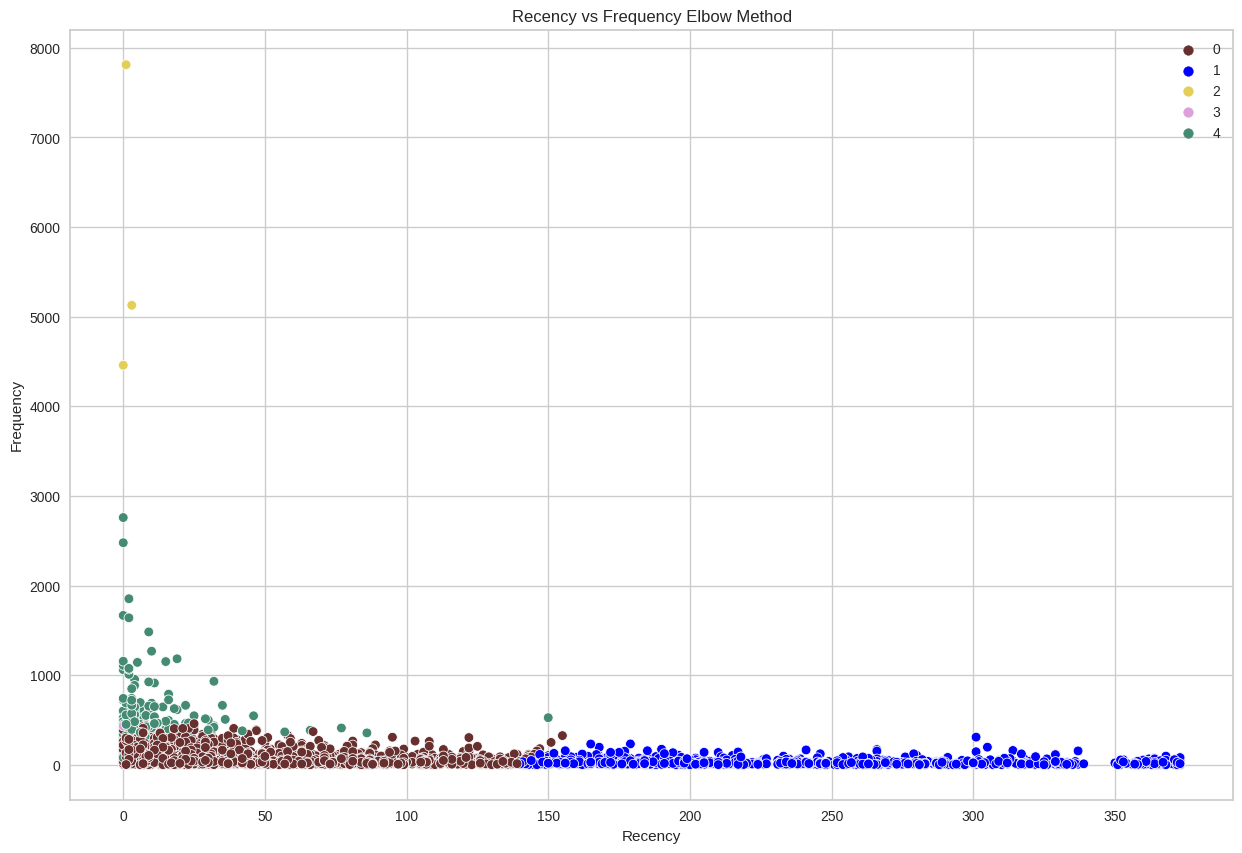

In [ ]:
#Recency VS Frequency
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD",'#458B74']
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["Cluster_Elbow"], palette= pal_elbow)
pl.set_title("Recency vs Frequency Elbow Method")
plt.legend()
plt.show()

**Analysis Cluster for Recency vs Frequency**

**- Cluster 0** --> **CUSTOMER NEEDING ATTENTION / CAN'T LOSE THEM**

For customers in this group, most of them have a recency of up to 150 days and the transaction frequency is not too high.

**- Cluster 1** --> **AT RISK**

Customers who are rarely active/make transactions, and the frequency of transactions is also very small.

**- Cluster 2** --> **CHAMPION**

Customer who has a recent recency/transaction less than 50 days and has the highest transaction frequency.

**- Cluster 3** --> **PROMISING**

The scatter plot for cluster 3 is not very visible because it is covered by cluster 4 (green), customers in this cluster are those with little recency, but the frequency of transactions is quite frequent/high.

**- Cluster 4** --> **LOYAL CUSTOMER**

Most of the customers in this group have transactions of less than 100 days and the transaction frequency is quite high.


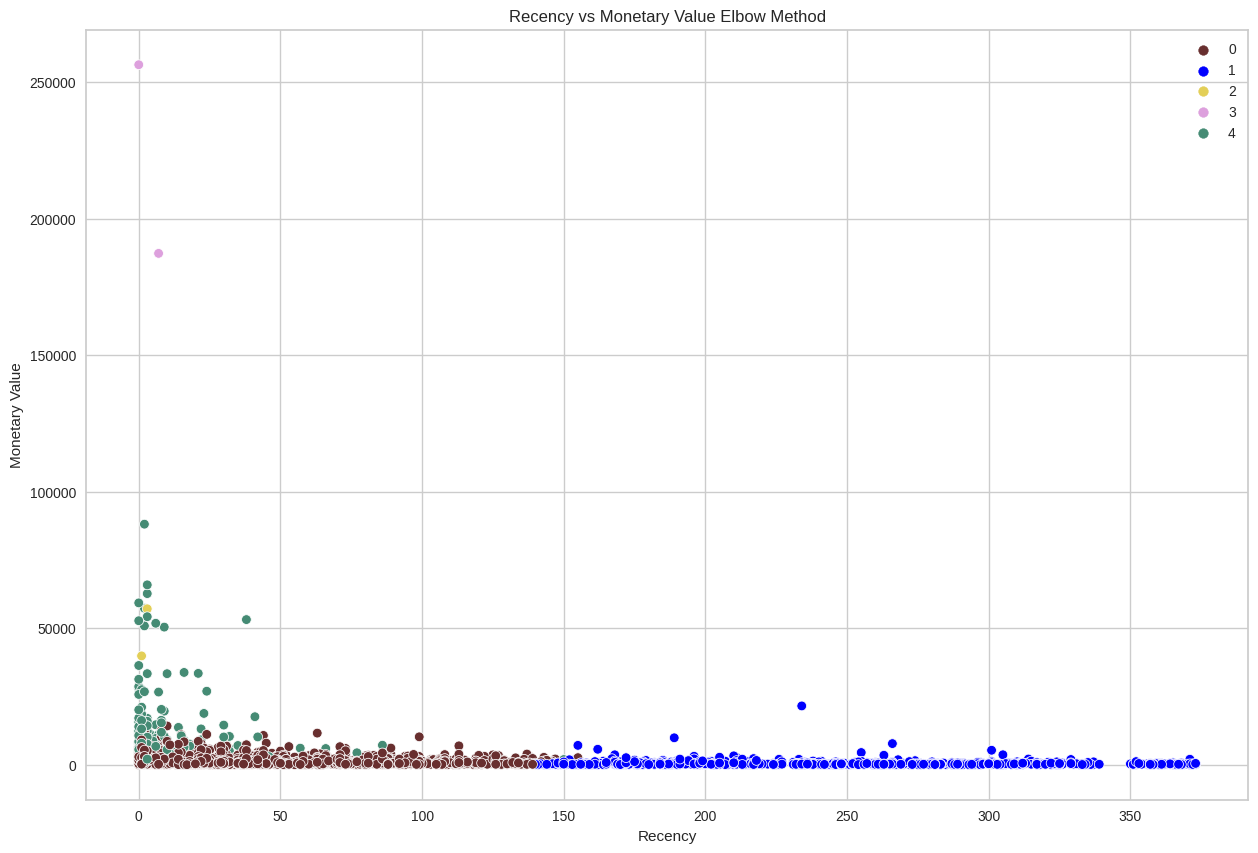

In [ ]:
#Recency VS Monetary Value
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD",'#458B74']
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Monetary Value'], hue = data_rfm["Cluster_Elbow"], palette= pal_elbow)
pl.set_title("Recency vs Monetary Value Elbow Method")
plt.legend()
plt.show()

**Analysis Cluster for Recency vs Monetary Value**

**Cluster 0** --> **NEEDING ATTENTION/CAN'T LOSE THEM**

For customers in this group, most of them have a recency of up to 150 days and the monetary value is not too high.

**Cluster 1** --> **AT RISK CUSTOMER**

Customers who have made last transactions more than or equal to 140 days ago, and little money spent.


**Cluster 2** --> **PROMISING**

Customers in this cluster are those with little recency, but the spend quite a lot of money.

**Cluster 3** --> **CHAMPION**

Customers who made their last transaction less than 50 days and spent a lot of money on the transaction.


**Cluster 4** --> **LOYAL CUSTOMER**

Most of the customers in this group have transactions of less than 100 days and also spend quite a lot of money.


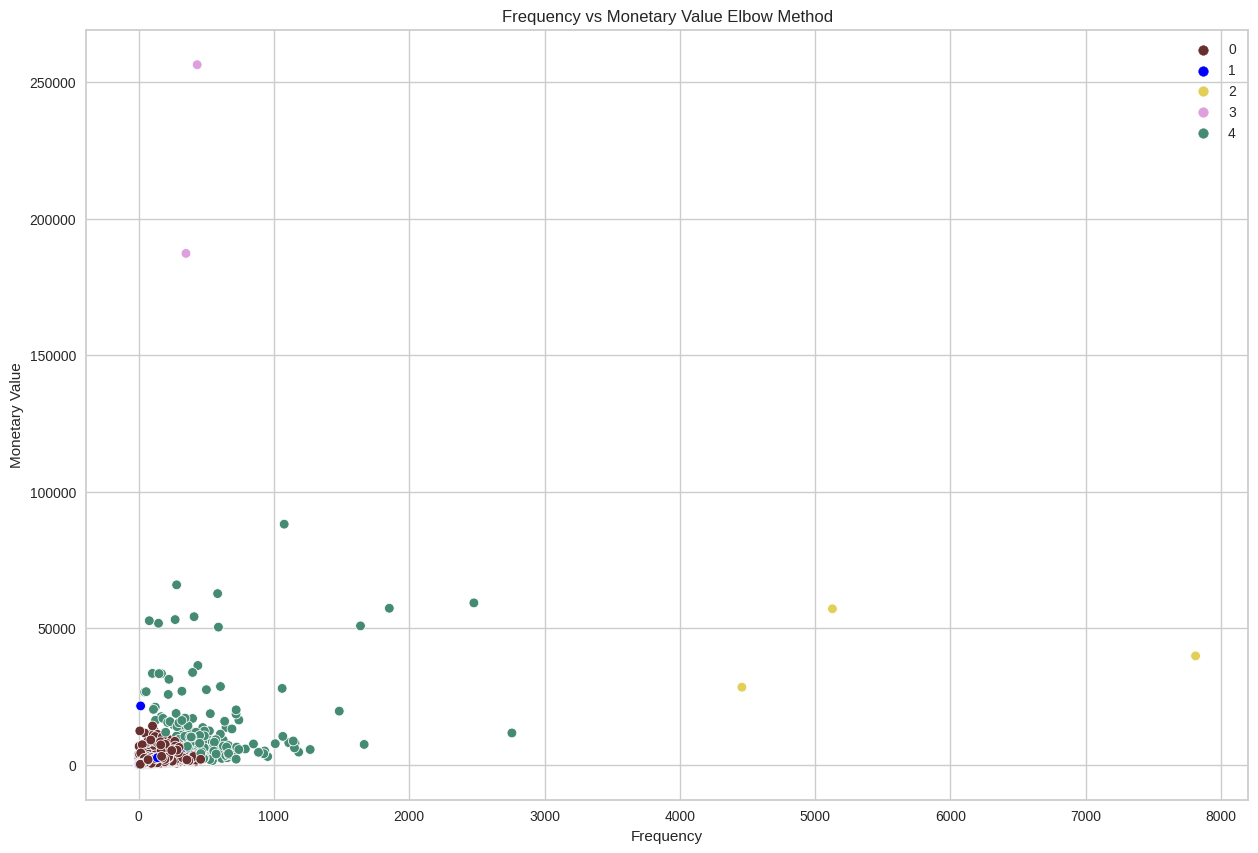

In [ ]:
#Frequency VS Monetary Value
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD",'#458B74']
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['Monetary Value'], hue = data_rfm["Cluster_Elbow"], palette= pal_elbow)
pl.set_title("Frequency vs Monetary Value Elbow Method")
plt.legend()
plt.show()

**Analysis Cluster for Frequency vs Monetary Value**

**Cluster 0** --> **AT RISK**

customers who have low frequency and monetary value.

**Cluster 1** --> **CUSTOMER NEEDING ATTENTION/ CAN'T LOSE THEM**

customers who have a relatively low transaction frequency and monetary value




**Cluster 2** --> **PROMISING**

customers who have frequency of transactions and monetary value is quite high.

**Cluster 3** --> **CHAMPION**

Although this customer on this grup have little frequency of transaction, they spend a lot of money.

**Cluster 4** --> **LOYAL CUSTOMER**

Customers who have monetarvy value less than $100000, but the frequency of transcation is quite high



## **Modelling for Silhoutte Method**

In [ ]:
kmeans_siluet = KMeans(
    n_clusters = 2,
    random_state = 1000
)
kmeans_siluet.fit(data_for_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=1000)

In [ ]:
#Assign cluster to 'cluster' column
data_rfm['cluster_siluet'] = kmeans_siluet.labels_
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0,0
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1,1
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0,0
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0,0
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1,1


In [ ]:
data_rfm.cluster_siluet.value_counts()

0    3064
1    1021
Name: cluster_siluet, dtype: int64

Text(0.5, 1.0, 'Total Customer for Each Segment')

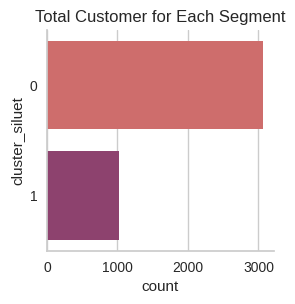

In [ ]:
sns.catplot(
    y = 'cluster_siluet',
    data = data_rfm,
    kind = 'count',
    palette = "flare",
    height = 3
).ax.set_title("Total Customer for Each Segment")

<Axes: xlabel='cluster_siluet', ylabel='Recency'>

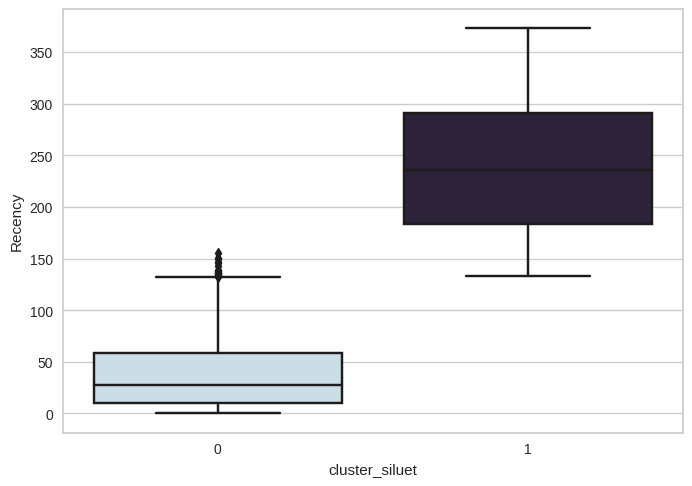

In [ ]:
sns.boxplot(x= 'cluster_siluet', y = 'Recency', data = data_rfm, palette = "ch:s=.25,rot=-.25")

<Axes: xlabel='cluster_siluet', ylabel='Frequency'>

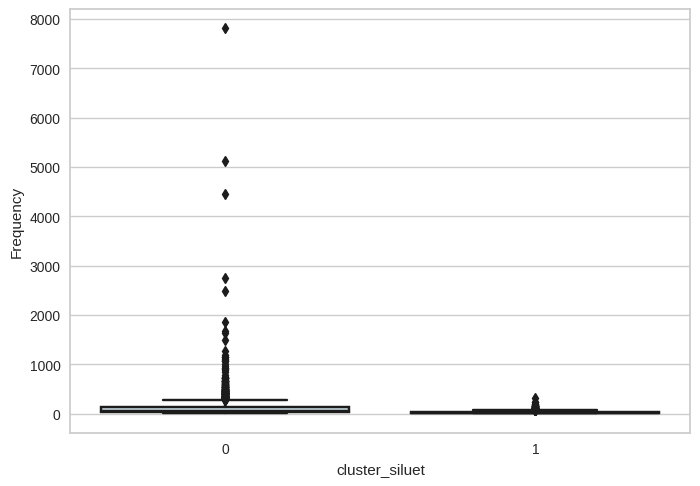

In [ ]:
sns.boxplot(x= 'cluster_siluet', y = 'Frequency', data = data_rfm, palette = "ch:s=.25,rot=-.25")

<Axes: xlabel='cluster_siluet', ylabel='Monetary Value'>

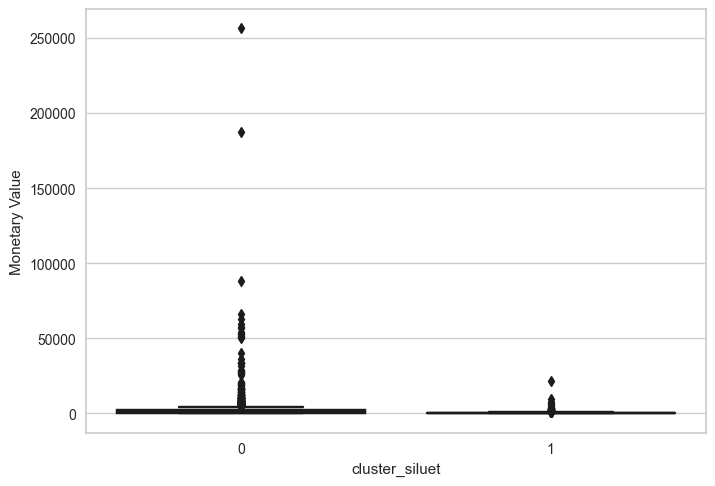

In [ ]:
sns.boxplot(x= 'cluster_siluet', y = 'Monetary Value', data = data_rfm, palette = "ch:s=.25,rot=-.25")

visualization scatter plot

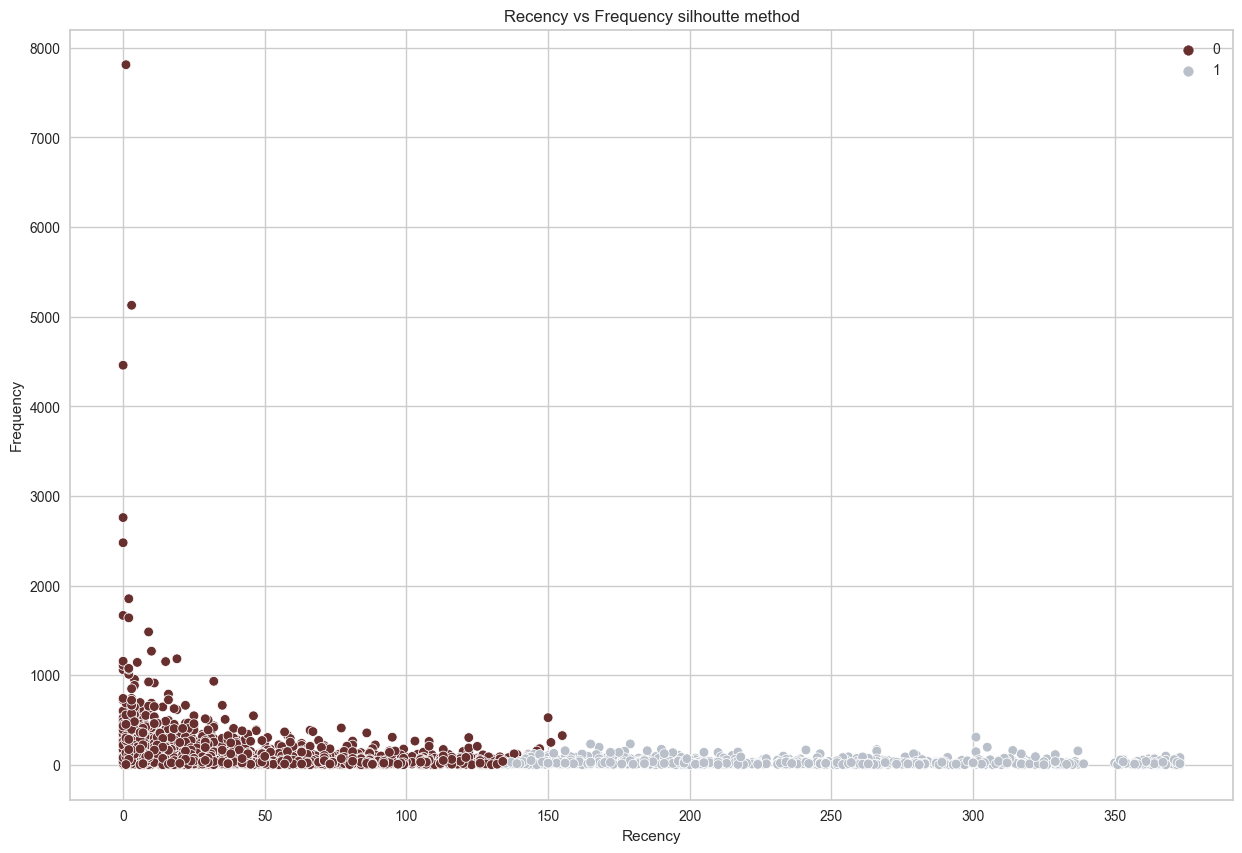

In [ ]:
#Recency vs Frequency
pal = ["#682F2F","#B9C0C9"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["cluster_siluet"], palette= pal)
pl.set_title("Recency vs Frequency silhoutte method")
plt.legend()
plt.show()

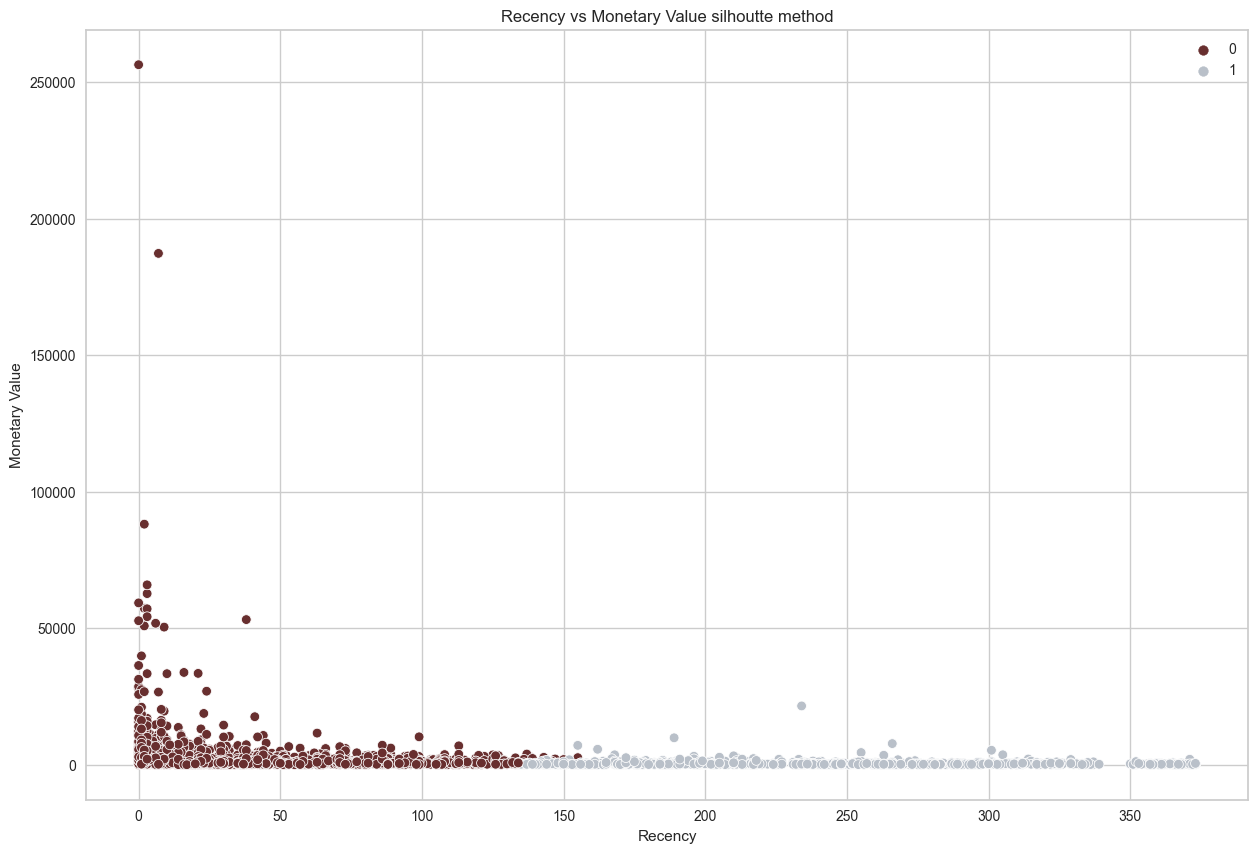

In [ ]:
#Recency vs Monetary Value
pal = ["#682F2F","#B9C0C9"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Monetary Value'], hue = data_rfm["cluster_siluet"], palette= pal)
pl.set_title("Recency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

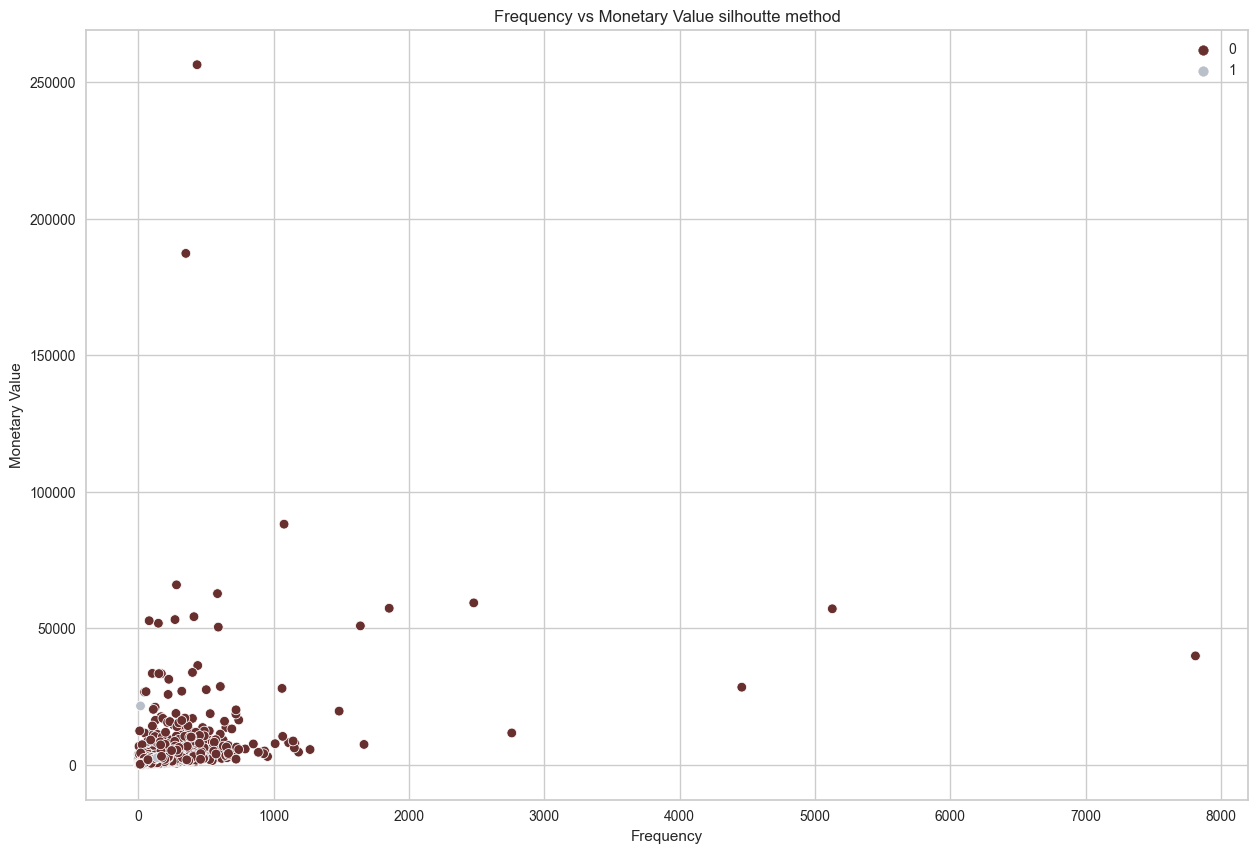

In [ ]:
#Frequency vs Monetary Value
pal = ["#682F2F","#B9C0C9"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['Monetary Value'], hue = data_rfm["cluster_siluet"], palette= pal)
pl.set_title("Frequency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

Based on Visualization of Elbow Method and Silhoutte Method, it can be conclude that Elbow method produces the best K-Means than the Silhouette Method for the following reasons:
1. The range values for the graphs of recency vs monetary value, recency vs frequency: have an unclear range.
2. Consistency of values, graphs of recency vs. monetary value, recency vs. frequency: have values that are inconsistent with the limits of value. (there is an anomaly in the value).

##**Value Counts Each Cluster on Cluster_Elbow Columns**

In [ ]:
data_elbow_0 = data_rfm[data_rfm['Cluster_Elbow'] == 0 ]
data_elbow_0.RFM_Score.value_counts()

444    309
211    173
333    164
344    153
233    151
222    148
433    146
311    113
322    109
244     96
212     89
223     87
343     81
443     80
434     73
422     70
332     67
411     66
232     53
334     52
234     50
323     50
321     48
432     47
221     43
423     39
243     35
312     32
213     28
412     22
331     22
231     21
421     20
224     18
342     17
413     15
424     15
214     14
431     13
324     13
313     12
442     11
242      9
314      8
144      5
143      4
122      4
111      3
121      3
133      2
134      2
441      2
414      2
132      1
112      1
142      1
113      1
Name: RFM_Score, dtype: int64

In [ ]:
data_elbow_1 = data_rfm[data_rfm['Cluster_Elbow'] == 1]
data_elbow_1.RFM_Score.value_counts()

111    360
122    178
112    111
121    103
133     58
132     48
131     32
123     31
113     20
144     17
143     16
134      8
114      5
124      3
142      3
Name: RFM_Score, dtype: int64

In [ ]:
data_elbow_2 = data_rfm[data_rfm['Cluster_Elbow'] == 2 ]
data_elbow_2.RFM_Score.value_counts()

444    3
Name: RFM_Score, dtype: int64

In [ ]:
data_elbow_3 = data_rfm[data_rfm['Cluster_Elbow'] == 3 ]
data_elbow_3.RFM_Score.value_counts()

444    2
Name: RFM_Score, dtype: int64

In [ ]:
data_elbow_4 = data_rfm[data_rfm['Cluster_Elbow'] == 4 ]
data_elbow_4.RFM_Score.value_counts()

444    136
344     28
244      4
434      3
334      1
443      1
144      1
Name: RFM_Score, dtype: int64

#**Reducing Cluster**

After seeing the distribution of clustering using scatter plot, it can be seen that there are some of range of distribution of clustering is not clear. Therefore, we need to reduce the cluster.


### **Reduce Cluster for Recency & Frequency**

In [ ]:
def cluster_elbow_rf(cluster_elbow,r,f):
    if r >= 140:
        return 1
    elif f >= 4000:
        return 2
    elif (cluster_elbow == 0 and f <=460 and r <= 140) or (cluster_elbow == 3 and f <=460 and r <= 140) or(cluster_elbow == 4 and f <= 460):
        return 0
    elif (cluster_elbow == 4 and 460 < f < 4000):
        return 4

In [ ]:
data_rfm['RF_Cluster_Elbow'] = data_rfm.apply(lambda x: cluster_elbow_rf(x['Cluster_Elbow'],x['Recency'],x['Frequency']),axis=1)

In [ ]:
data_rfm.isna().sum()

CustomerID          0
Recency             0
Frequency           0
Monetary Value      0
R                   0
F                   0
M                   0
RFM_Score           0
RFM_Segment         0
Cluster             0
Cluster_Elbow       0
cluster_siluet      0
RF_Cluster_Elbow    0
dtype: int64

In [ ]:
x_invst = data_rfm[data_rfm['RF_Cluster_Elbow'].isna()]

In [ ]:
x_invst

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet,RF_Cluster_Elbow


In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet,RF_Cluster_Elbow
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0,0,0
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1,1,1
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0,0,0
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0,0,0
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost,1,1,1,1
4128,18281.0,180,7,80.82,1,1,1,111,Lost,1,1,1,1
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers,0,0,0,0
4130,18283.0,3,721,2045.53,4,4,4,444,Champion,0,4,0,4


<ipython-input-68-3a14b1349acf>:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["RF_Cluster_Elbow"], palette= pal_elbow)


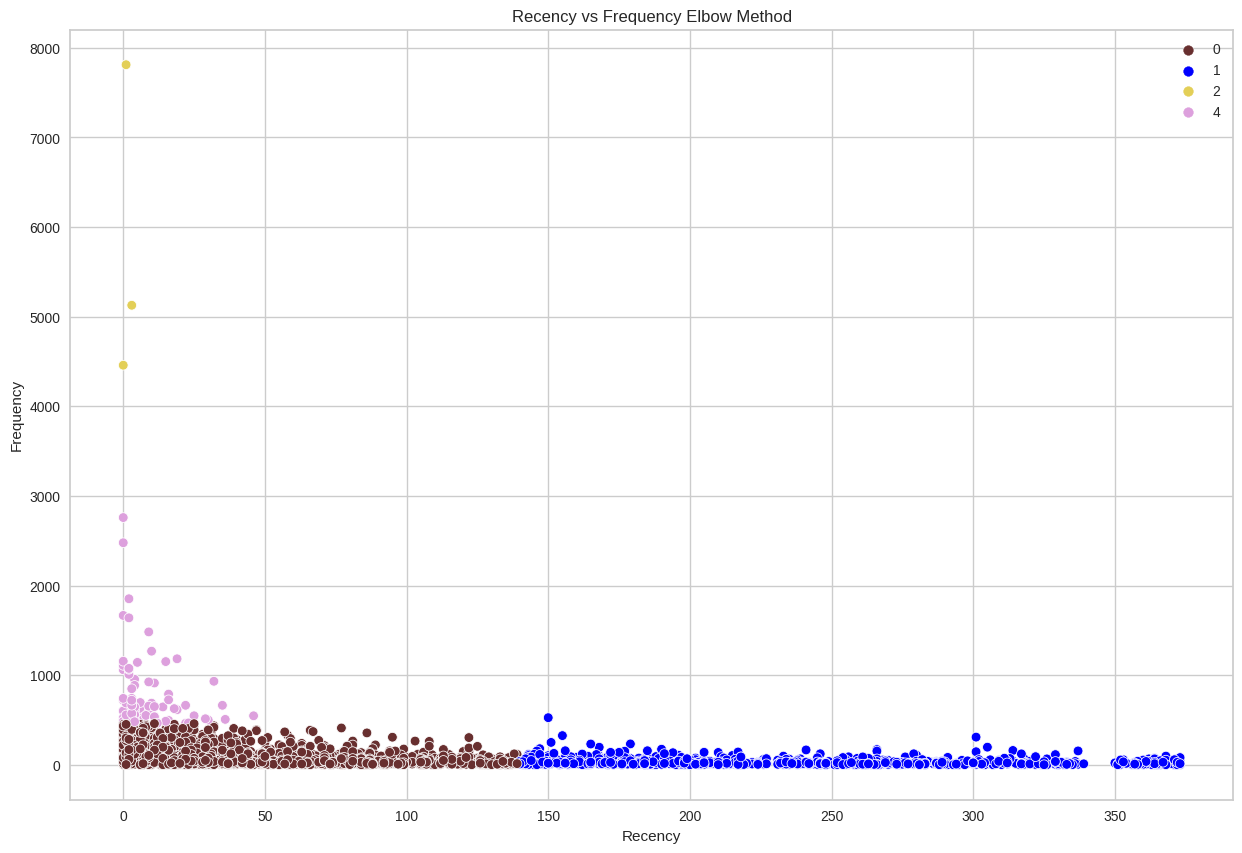

In [ ]:
#Recency VS Frequency
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD",'#458B74']
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["RF_Cluster_Elbow"], palette= pal_elbow)
pl.set_title("Recency vs Frequency Elbow Method")
plt.legend()
plt.show()

In [ ]:
data_rfm.RF_Cluster_Elbow.value_counts()

0    2984
1    1007
4      91
2       3
Name: RF_Cluster_Elbow, dtype: int64

In [ ]:
def segment_rf(cluster_elbow_rf):
    if cluster_elbow_rf == 0:
        return "Customer Need Attention (Cannot Lose Them)"
    elif cluster_elbow_rf == 1:
        return "At Risk"
    elif cluster_elbow_rf == 2:
        return "Customer CHAMPION"
    elif cluster_elbow_rf == 4:
        return "Loyal"

In [ ]:
data_rfm['RFM_segment_RF'] = data_rfm.apply(lambda x: segment_rf(x['RF_Cluster_Elbow']),axis=1)

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet,RF_Cluster_Elbow,RFM_segment_RF
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0,0,0,Customer Need Attention (Cannot Lose Them)
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1,1,1,At Risk
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0,0,0,Customer Need Attention (Cannot Lose Them)
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0,0,0,Customer Need Attention (Cannot Lose Them)
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1,1,1,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost,1,1,1,1,At Risk
4128,18281.0,180,7,80.82,1,1,1,111,Lost,1,1,1,1,At Risk
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers,0,0,0,0,Customer Need Attention (Cannot Lose Them)
4130,18283.0,3,721,2045.53,4,4,4,444,Champion,0,4,0,4,Loyal


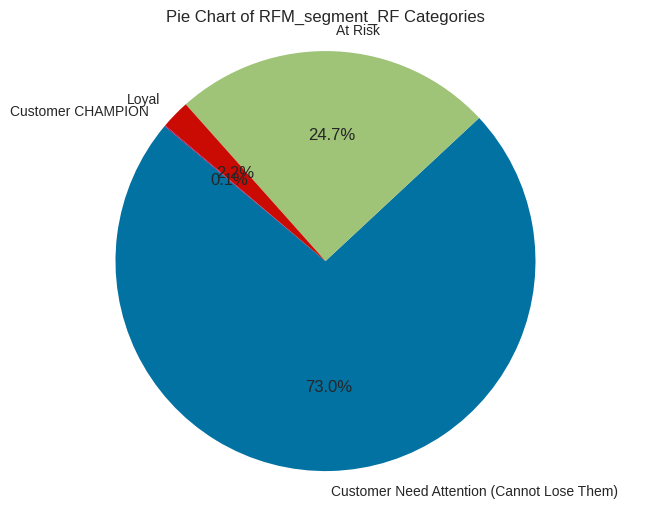

In [ ]:
# Menghitung jumlah masing-masing kategori
category_counts = data_rfm['RFM_segment_RF'].value_counts()

# Membuat plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Mengatur aspek rasio agar menjadi lingkaran
plt.title('Pie Chart of RFM_segment_RF Categories')
plt.show()

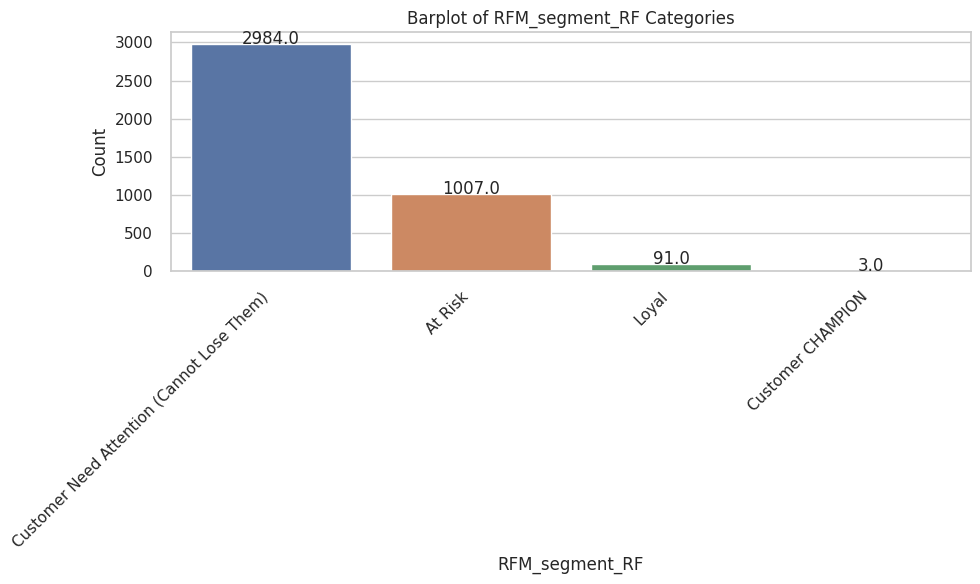

In [ ]:
# Menghitung jumlah masing-masing kategori
category_counts = data_rfm['RFM_segment_RF'].value_counts()

# Membuat plot barplot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.set(style="whitegrid")
ax = sns.countplot(x='RFM_segment_RF', data=data_rfm, order=category_counts.index)

# Menambahkan angka di atas tiap stack
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Barplot of RFM_segment_RF Categories')
plt.xlabel('RFM_segment_RF')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

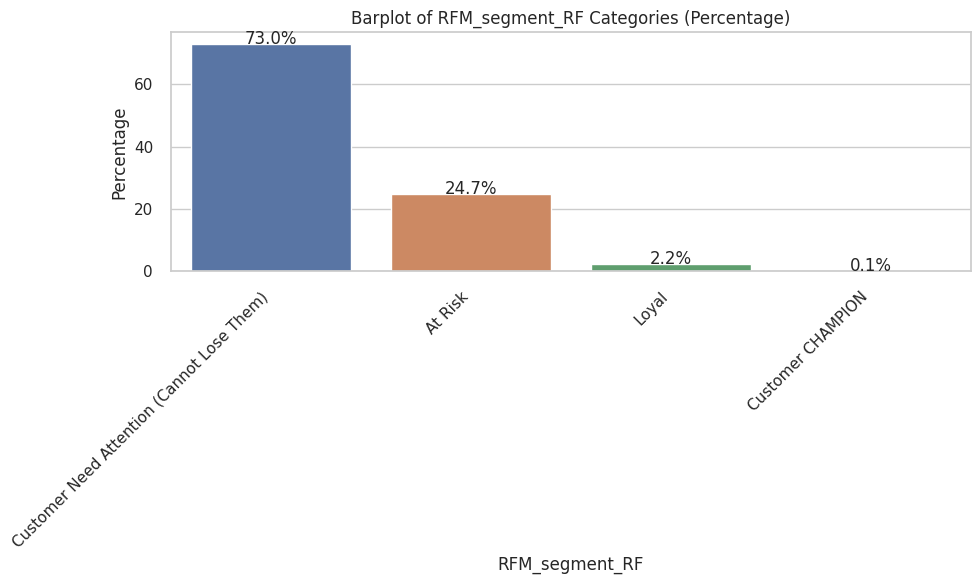

In [ ]:
# Menghitung jumlah masing-masing kategori
category_counts = data_rfm['RFM_segment_RF'].value_counts()

# Menghitung total data
total_data = len(data_rfm)

# Menghitung persentase untuk setiap kategori
category_percentages = (category_counts / total_data) * 100

# Membuat plot barplot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.set(style="whitegrid")
ax = sns.barplot(x=category_percentages.index, y=category_percentages.values)

# Menambahkan angka di atas tiap stack
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Barplot of RFM_segment_RF Categories (Percentage)')
plt.xlabel('RFM_segment_RF')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_rfm.isna().sum()

CustomerID          0
Recency             0
Frequency           0
Monetary Value      0
R                   0
F                   0
M                   0
RFM_Score           0
RFM_Segment         0
Cluster             0
Cluster_Elbow       0
cluster_siluet      0
RF_Cluster_Elbow    0
RFM_segment_RF      0
dtype: int64

In [ ]:
data_rfm.RFM_segment_RF.value_counts()

Customer Need Attention (Cannot Lose Them)    2984
At Risk                                       1007
Loyal                                           91
Customer CHAMPION                                3
Name: RFM_segment_RF, dtype: int64

**Analysis Cluster Segmentation:**
- Cluster 0 (Customer Need Attention)

For customers in this group, most of them have a recency of up to 150 days and the transaction frequency is not too high.

- Cluster 1 (At Risk)

customers who have made transactions more than or equal to 140 days ago, and the frequency of transactions is also very small.

- Cluster 2 (Champion)

customers who made their last transaction less than 50 days and have the highest transaction frequency.

- Cluster 4 (Loyal)

most of the customers in this group have the last transaction less than 100 days and the transaction frequency is quite high.



### **Reduce Cluster for Recency & Monetary Value**

In [ ]:
def cluster_elbow_rm(cluster_elbow,r,m):
    if r >= 140:
        return 1
    elif m >= 180000:
        return 3
    elif (cluster_elbow == 0 and r <=140 and m <=15000) or (cluster_elbow == 4 and m <=15000 and r <= 100):
        return 0
    elif (cluster_elbow == 4 and 15000 < m < 90000) or (cluster_elbow == 2 and m <= 60000):
        return 4

In [ ]:
data_rfm['RM_Cluster_Elbow'] = data_rfm.apply(lambda x: cluster_elbow_rm(x['Cluster_Elbow'],x['Recency'],x['Monetary Value']),axis=1)

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet,RF_Cluster_Elbow,RFM_segment_RF,RM_Cluster_Elbow
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0,0,0,Customer Need Attention (Cannot Lose Them),0
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1,1,1,At Risk,1
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0,0,0,Customer Need Attention (Cannot Lose Them),0
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0,0,0,Customer Need Attention (Cannot Lose Them),0
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1,1,1,At Risk,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost,1,1,1,1,At Risk,1
4128,18281.0,180,7,80.82,1,1,1,111,Lost,1,1,1,1,At Risk,1
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers,0,0,0,0,Customer Need Attention (Cannot Lose Them),0
4130,18283.0,3,721,2045.53,4,4,4,444,Champion,0,4,0,4,Loyal,0


In [ ]:
data_rfm.isna().sum()

CustomerID          0
Recency             0
Frequency           0
Monetary Value      0
R                   0
F                   0
M                   0
RFM_Score           0
RFM_Segment         0
Cluster             0
Cluster_Elbow       0
cluster_siluet      0
RF_Cluster_Elbow    0
RFM_segment_RF      0
RM_Cluster_Elbow    0
dtype: int64

<ipython-input-59-58a2322cfa2c>:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Monetary Value'], hue = data_rfm["RM_Cluster_Elbow"], palette= pal_elbow)


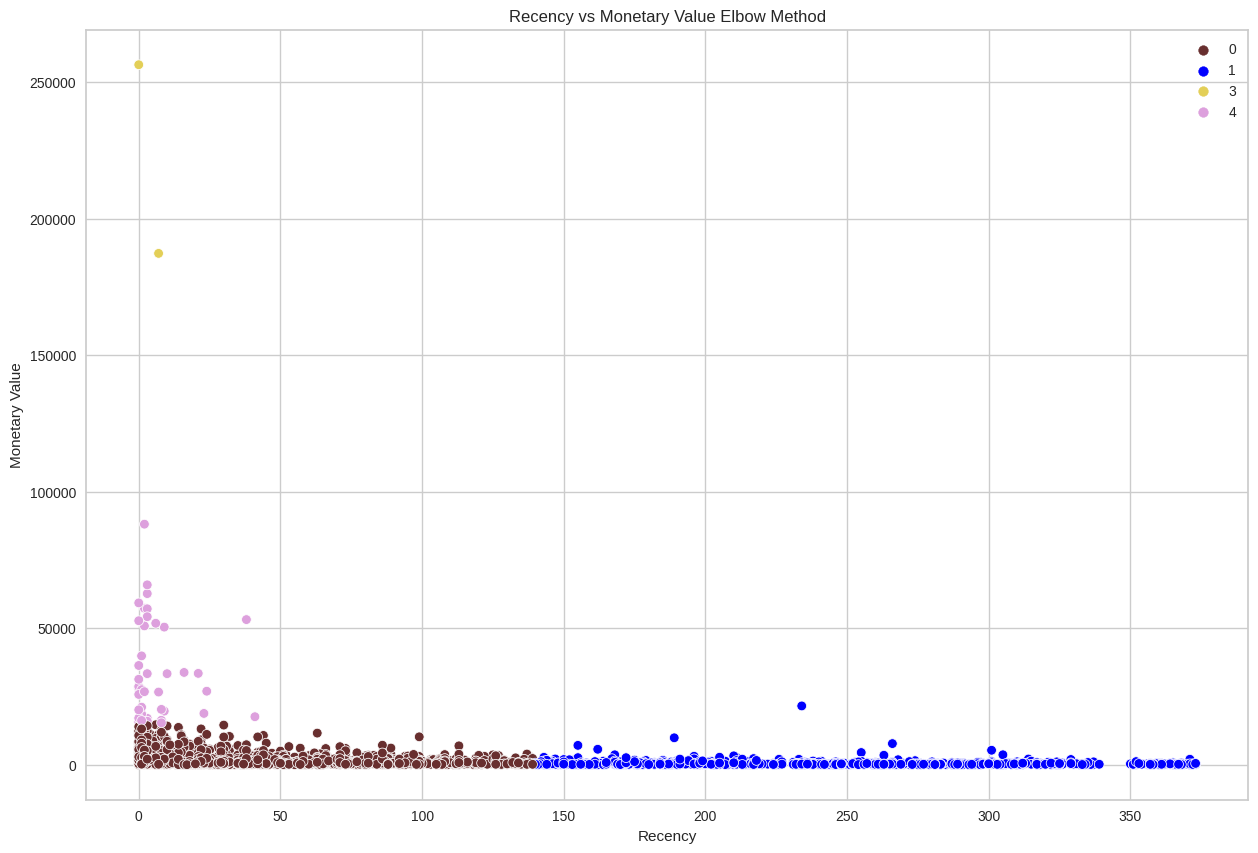

In [ ]:
#RM
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD",'#458B74']
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Monetary Value'], hue = data_rfm["RM_Cluster_Elbow"], palette= pal_elbow)
pl.set_title("Recency vs Monetary Value Elbow Method")
plt.legend()
plt.show()

In [ ]:
def segment_rm(cluster_elbow_rm):
    if cluster_elbow_rm == 0:
        return "Customer Need Attention (Cannot Lose Them)"
    elif cluster_elbow_rm == 1:
        return "At Risk"
    elif cluster_elbow_rm == 3:
        return "Customer CHAMPION"
    elif cluster_elbow_rm == 4:
        return "Loyal"

In [ ]:
data_rfm['RFM_segment_RM'] = data_rfm.apply(lambda x: segment_rm(x['RM_Cluster_Elbow']),axis=1)

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet,RF_Cluster_Elbow,RFM_segment_RF,RM_Cluster_Elbow,RFM_segment_RM
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them)
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1,1,1,At Risk,1,At Risk
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them)
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them)
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk
4128,18281.0,180,7,80.82,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them)
4130,18283.0,3,721,2045.53,4,4,4,444,Champion,0,4,0,4,Loyal,0,Customer Need Attention (Cannot Lose Them)


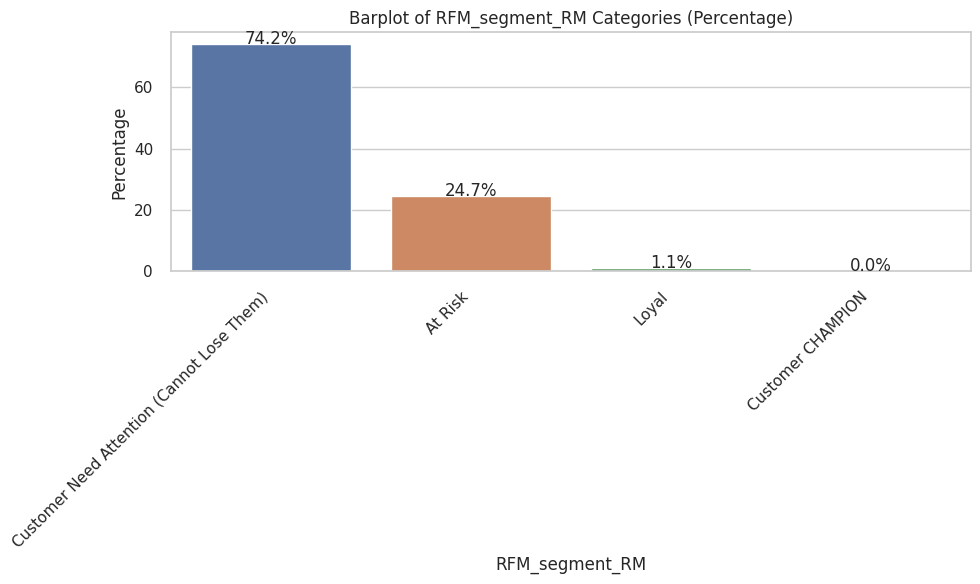

In [ ]:
# Menghitung jumlah masing-masing kategori
category_counts = data_rfm['RFM_segment_RM'].value_counts()

# Menghitung total data
total_data = len(data_rfm)

# Menghitung persentase untuk setiap kategori
category_percentages = (category_counts / total_data) * 100

# Membuat plot barplot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.set(style="whitegrid")
ax = sns.barplot(x=category_percentages.index, y=category_percentages.values)

# Menambahkan angka di atas tiap stack
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Barplot of RFM_segment_RM Categories (Percentage)')
plt.xlabel('RFM_segment_RM')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_rfm.RFM_segment_RM.value_counts()

Customer Need Attention (Cannot Lose Them)    3031
At Risk                                       1007
Loyal                                           45
Customer CHAMPION                                2
Name: RFM_segment_RM, dtype: int64

**Analysis Cluster Segmentation:**

- Cluster 0 (Customer Need Attention)

for customers in this group, most of them have a recency of up to 150 days and spent money on the transaction is not too high.
- Cluster 1 (At Risk)

customers who have made last transactions more than or equal to 140 days ago, and very little money spent.
- Cluster 3 (Champion)

customers who made their last transaction less than 50 days and spent a lot of money on the transaction.
- Cluster 4 (Loyal)

most of the customers in this group also have the last transaction less than 50 days and the money spent on the transaction is quite high.



### **Reduce Frequency and Monetary Value**

In [ ]:
def cluster_elbow_fm(cluster_elbow,f,m):
    if m >= 180000:
        return 3
    elif f >= 4000:
        return 2
    elif (cluster_elbow == 0  and f <=459 and m <= 15000) or (cluster_elbow == 1 and f <=300 and m <= 20000) or (cluster_elbow == 4 and f <=459 and m <= 15000):
        return 0
    elif (cluster_elbow == 4 and f <= 2759 and m <=89000) or (cluster_elbow == 1 and f <= 2759 and m <=89000):
        return 4

In [ ]:
data_rfm['FM_Cluster_Elbow'] = data_rfm.apply(lambda x: cluster_elbow_fm(x['Cluster_Elbow'],x['Frequency'],x['Monetary Value']),axis=1)

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet,RF_Cluster_Elbow,RFM_segment_RF,RM_Cluster_Elbow,RFM_segment_RM,FM_Cluster_Elbow
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1,1,1,At Risk,1,At Risk,0
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk,0
4128,18281.0,180,7,80.82,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk,0
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0
4130,18283.0,3,721,2045.53,4,4,4,444,Champion,0,4,0,4,Loyal,0,Customer Need Attention (Cannot Lose Them),4


In [ ]:
data_rfm.isna().sum()

CustomerID          0
Recency             0
Frequency           0
Monetary Value      0
R                   0
F                   0
M                   0
RFM_Score           0
RFM_Segment         0
Cluster             0
Cluster_Elbow       0
cluster_siluet      0
RF_Cluster_Elbow    0
RFM_segment_RF      0
RM_Cluster_Elbow    0
RFM_segment_RM      0
FM_Cluster_Elbow    0
dtype: int64

<ipython-input-77-d7b47e60415c>:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['Monetary Value'], hue = data_rfm["FM_Cluster_Elbow"], palette= pal_elbow)


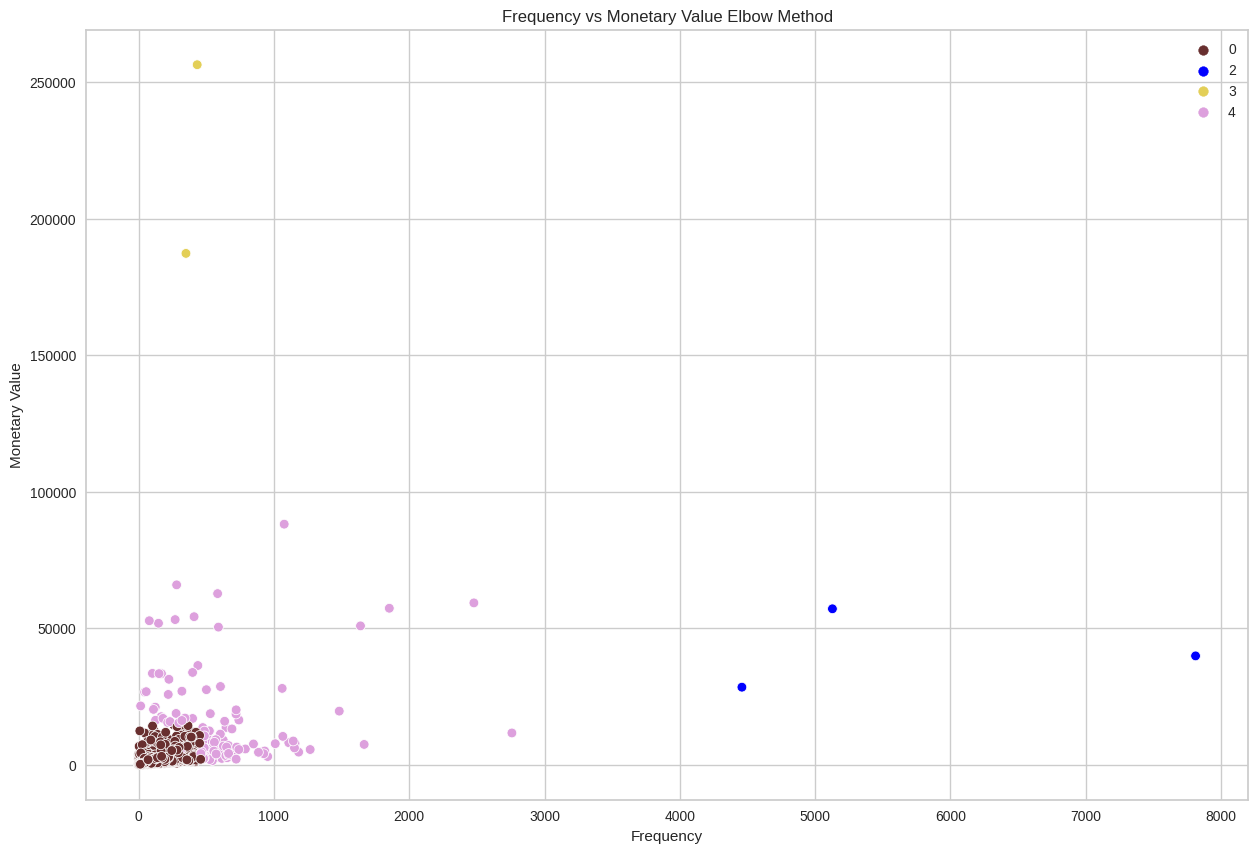

In [ ]:
#FM
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD",'#458B74']
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['Monetary Value'], hue = data_rfm["FM_Cluster_Elbow"], palette= pal_elbow)
pl.set_title("Frequency vs Monetary Value Elbow Method")
plt.legend()
plt.show()

In [ ]:
def segment_fm(cluster_elbow_fm):
    if cluster_elbow_fm == 0:
        return "At risk"
    elif cluster_elbow_fm == 2:
        return "Loyal"
    elif cluster_elbow_fm == 3:
        return "Customer CHAMPION"
    elif cluster_elbow_fm == 4:
        return "Promising"

In [ ]:
data_rfm['RFM_segment_FM'] = data_rfm.apply(lambda x: segment_fm(x['FM_Cluster_Elbow']),axis=1)

In [ ]:
data_rfm

,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_Score,RFM_Segment,Cluster,Cluster_Elbow,cluster_siluet,RF_Cluster_Elbow,RFM_segment_RF,RM_Cluster_Elbow,RFM_segment_RM,FM_Cluster_Elbow,RFM_segment_FM
1,12413.0,66,40,694.15,2,2,3,223,Customer Needing Attention,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0,At risk
2,12426.0,194,30,582.73,1,2,2,122,At Risk,1,1,1,1,At Risk,1,At Risk,0,At risk
3,12427.0,11,35,708.37,4,2,3,423,Promising,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0,At risk
4,12437.0,1,201,4896.66,4,4,4,444,Champion,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0,At risk
5,12441.0,366,11,173.55,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk,0,At risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,18280.0,277,10,180.60,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk,0,At risk
4128,18281.0,180,7,80.82,1,1,1,111,Lost,1,1,1,1,At Risk,1,At Risk,0,At risk
4129,18282.0,7,13,176.60,4,1,1,411,Recent Customers,0,0,0,0,Customer Need Attention (Cannot Lose Them),0,Customer Need Attention (Cannot Lose Them),0,At risk
4130,18283.0,3,721,2045.53,4,4,4,444,Champion,0,4,0,4,Loyal,0,Customer Need Attention (Cannot Lose Them),4,Promising


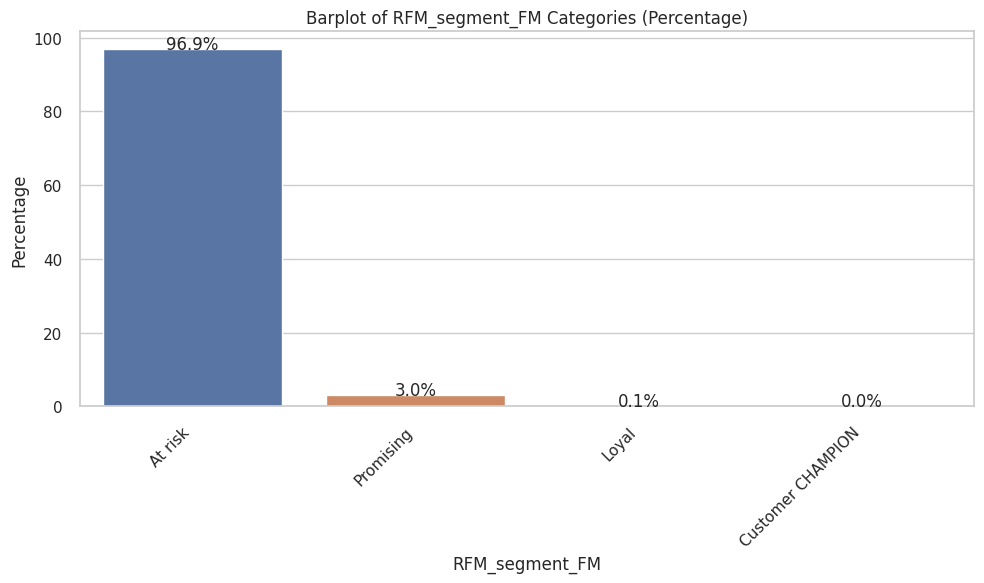

In [ ]:
# Menghitung jumlah masing-masing kategori
category_counts = data_rfm['RFM_segment_FM'].value_counts()

# Menghitung total data
total_data = len(data_rfm)

# Menghitung persentase untuk setiap kategori
category_percentages = (category_counts / total_data) * 100

# Membuat plot barplot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.set(style="whitegrid")
ax = sns.barplot(x=category_percentages.index, y=category_percentages.values)

# Menambahkan angka di atas tiap stack
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Barplot of RFM_segment_FM Categories (Percentage)')
plt.xlabel('RFM_segment_FM')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_rfm.RFM_segment_FM.value_counts()

At risk              3958
Promising             122
Loyal                   3
Customer CHAMPION       2
Name: RFM_segment_FM, dtype: int64

**Analysis Customer Segmentation:**
- Cluster 0 (At Risk)

customers who have low frequency and monetary value.
- Cluster 2 (Loyal)

customers who have a monetary value of less than $100000, but they are customers who make transactions most often.
- Cluster 3 (Champion)

Although this customer on this grup have little frequency of transaction, they spend a lot of money.
- Cluster 4 (Promising)

customers who have frequency of transactions and monetary value is quite high.



# **Recommendation**


**Recommendation for Clustering Based Recency & Frequency**

- Customer Need Attention

Focus on reminding these customers about the value your products or services offer. Consider offering limited-time promotions to entice them back.

- Customer at Risk

Run targeted campaigns that address potential concerns they might have had or any obstacles preventing them from making a purchase.

- Customer Champion

Keep them engaged with personalized recommendations based on their purchase history. Consider offering them an exclusive preview of upcoming product releases.

- Customer Loyal

Provide them with early access to sales and promotions. Consider creating a loyalty tier system where their benefits increase with their continued loyalty.





**Recommendation for Clustering Based Recency & Monetary Value**

- Customer Need Attention

Implement win-back campaigns with special offers tailored to their past purchases. Offer bundles or products that align with their buying history.

- Customer at Risk

Run targeted email campaigns showcasing the value proposition of your products or services. Offer limited-time promotions to encourage them to make a purchase.

- Customer Champion

Create an exclusive loyalty club for these customers, providing early access to sales, personalized product recommendations, and dedicated customer support.

- Customer Loyal

Send personalized thank-you messages for their continued support. Offer them VIP status with benefits like free shipping, advanced access to new releases, and special discounts.







**Recommendation for Clustering Based Frequency & Monetary Value**
- Customer at Risk

Send personalized emails with product recommendations based on their past purchases. Consider loyalty programs with rewards that encourage them to increase both their frequency and spending.


- Customer Loyal

Launch a loyalty program that offers points for each transaction, leading to discounts or free products after accumulating a certain number of points.


- Customer Champion

Provide personalized concierge-style service for these customers, offering tailored product recommendations and early access to limited editions or exclusive items.


- Customer Promising

Launch a premium subscription program that includes benefits like free shipping, exclusive content, and early access to new releases.





